In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency
import squarify
import statsmodels.api as sm
import matplotlib.gridspec as gridspec

import importlib.util
import os

# Step 1: Define the path to the 'funciones.py' relative to the current working directory
module_path = os.path.join(os.getcwd(), '..', 'utils', 'funciones.py')

# Step 2: Load the module dynamically using importlib
spec = importlib.util.spec_from_file_location('bct', module_path)
bct = importlib.util.module_from_spec(spec)
spec.loader.exec_module(bct)

In [2]:
# df = pd.read_csv('../data/eda_estudio.csv')
df_1 = pd.read_csv('../data/eda_estudio_part_1.csv', low_memory=False)
df_2 = pd.read_csv('../data/eda_estudio_part_2.csv', low_memory=False)
df_3 = pd.read_csv('../data/eda_estudio_part_3.csv', low_memory=False)
df_4 = pd.read_csv('../data/eda_estudio_part_4.csv', low_memory=False)
df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df

país            comunidad provincia provincia_iso       fecha sexo  \
0        Spain  Valencian Community  Alicante             A  2020-02-15    H   
1        Spain  Valencian Community  Alicante             A  2020-02-15    H   
2        Spain  Valencian Community  Alicante             A  2020-02-15    H   
3        Spain  Valencian Community  Alicante             A  2020-02-15    H   
4        Spain  Valencian Community  Alicante             A  2020-02-15    H   
...        ...                  ...       ...           ...         ...  ...   
1114015  Spain     Balearic Islands  Mallorca            PM  2022-02-26   NC   
1114016  Spain     Balearic Islands  Mallorca            PM  2022-02-26   NC   
1114017  Spain     Balearic Islands  Mallorca            PM  2022-02-26   NC   
1114018  Spain     Balearic Islands  Mallorca            PM  2022-02-26   NC   
1114019  Spain     Balearic Islands  Mallorca            PM  2022-02-26   NC   

        grupo_edad  num_casos  num_hosp  num_uci  num_def  \
0              0-9          0         0        0        0   
1            10-19          0         0        0        0   
2            20-29          0         0        0        0   
3            30-39          0         0        0        0   
4            40-49          0         0        0        0   
...            ...        ...       ...      ...      ...   
1114015      50-59          0         0        0        0   
1114016      60-69          0         0        0        0   
1114017      70-79          0         0        0        0   
1114018        80+          0         0        0        0   
1114019         NC          0         0        0        0   

                            place_id  comercio_ocio  supermercados_farmacias  \
0        ChIJfdrHtbc5Yg0RYMkh126vAgM            3.0                     -1.0   
1        ChIJfdrHtbc5Yg0RYMkh126vAgM            3.0                     -1.0   
2        ChIJfdrHtbc5Yg0RYMkh126vAgM            3.0                     -1.0   
3        ChIJfdrHtbc5Yg0RYMkh126vAgM            3.0                     -1.0   
4        ChIJfdrHtbc5Yg0RYMkh126vAgM            3.0                     -1.0   
...                              ...            ...                      ...   
1114015  ChIJV2Jp3FqSlxIRFU2l-yEDh_8          -13.0                     -3.0   
1114016  ChIJV2Jp3FqSlxIRFU2l-yEDh_8          -13.0                     -3.0   
1114017  ChIJV2Jp3FqSlxIRFU2l-yEDh_8          -13.0                     -3.0   
1114018  ChIJV2Jp3FqSlxIRFU2l-yEDh_8          -13.0                     -3.0   
1114019  ChIJV2Jp3FqSlxIRFU2l-yEDh_8          -13.0                     -3.0   

         parques  estaciones  trabajo  residencia  
0           34.0         7.0      0.0        -1.0  
1           34.0         7.0      0.0        -1.0  
2           34.0         7.0      0.0        -1.0  
3           34.0         7.0      0.0        -1.0  
4           34.0         7.0      0.0        -1.0  
...          ...         ...      ...         ...  
1114015     29.0         9.0    -10.0         1.0  
1114016     29.0         9.0    -10.0         1.0  
1114017     29.0         9.0    -10.0         1.0  
1114018     29.0         9.0    -10.0         1.0  
1114019     29.0         9.0    -10.0         1.0  

[1114020 rows x 18 columns]

In [3]:
df['fecha'] = pd.to_datetime(df['fecha'])


In [4]:
col_names = ['name', 'type', 'prio', 'card', 'card%']
row_names = ['país', 'comunidad', 'provincia', 'provincia_iso', 'fecha', 'sexo', 'grupo_edad', 'num_casos', 'num_hosp', 'num_uci', 'num_def', 'place_id',
 'comercio_ocio', 'supermercados_farmacias', 'parques', 'estaciones', 'trabajo', 'residencia']

def crea_df_std(df,col_names,row_names):
    row_types = []
    row_prio = []
    card = df.nunique()
    card_per = (df.nunique()/len(df) * 100).round(2)

    for col_name in row_names:
        col_type = df[col_name].dtype
        row_types.append(col_type)
        row_prio.append(3)
    df_std = pd.DataFrame(list(zip(row_names, row_types, row_prio, card, card_per)),columns=col_names)
    return df_std
df_std = crea_df_std(df,col_names,row_names)
df_std

name            type  prio  card  card%
0                      país          object     3     1   0.00
1                 comunidad          object     3    17   0.00
2                 provincia          object     3    50   0.00
3             provincia_iso          object     3    50   0.00
4                     fecha  datetime64[ns]     3   743   0.07
5                      sexo          object     3     3   0.00
6                grupo_edad          object     3    10   0.00
7                 num_casos           int64     3  1403   0.13
8                  num_hosp           int64     3   177   0.02
9                   num_uci           int64     3    32   0.00
10                  num_def           int64     3    79   0.01
11                 place_id          object     3    50   0.00
12            comercio_ocio         float64     3   180   0.02
13  supermercados_farmacias         float64     3   281   0.03
14                  parques         float64     3   503   0.05
15               estaciones         float64     3   233   0.02
16                  trabajo         float64     3   151   0.01
17               residencia         float64     3    59   0.01

In [5]:
prio_0 = ['num_casos', 'num_hosp', 'numu_ci', 'num_def', 'comercio_ocio', 'supermercados_farmacias', 'parques', 'estaciones', 'trabajo', 'residencia']
prio_1 = ['provincia', 'fecha', 'grupo_edad']
prio_2 = ['sexo', 'comunidad', 'provincia_iso']
prio = {'0': prio_0, '1': prio_1, '2': prio_2}

for i, j in prio.items():
    for k in j:
        df_std.loc[df_std['name'] == k, 'prio'] = int(i)
df_std

name            type  prio  card  card%
0                      país          object     3     1   0.00
1                 comunidad          object     2    17   0.00
2                 provincia          object     1    50   0.00
3             provincia_iso          object     2    50   0.00
4                     fecha  datetime64[ns]     1   743   0.07
5                      sexo          object     2     3   0.00
6                grupo_edad          object     1    10   0.00
7                 num_casos           int64     0  1403   0.13
8                  num_hosp           int64     0   177   0.02
9                   num_uci           int64     3    32   0.00
10                  num_def           int64     0    79   0.01
11                 place_id          object     3    50   0.00
12            comercio_ocio         float64     0   180   0.02
13  supermercados_farmacias         float64     0   281   0.03
14                  parques         float64     0   503   0.05
15               estaciones         float64     0   233   0.02
16                  trabajo         float64     0   151   0.01
17               residencia         float64     0    59   0.01

In [6]:
df_std["class"] = "Categorica"
df_std.loc[df_std.card == 2, "class"] = "Binaria"
df_std.loc[df_std["card"] > 50, "class"] ="Numerica Discreta"
df_std.loc[df_std["card%"] >= 0.01, "class"] = "Numerica Continua"
df_std.iloc[9,5] = 'Numerica Continua'
df_std.iloc[4,5] = 'Categorica'
df_std

name            type  prio  card  card%  \
0                      país          object     3     1   0.00   
1                 comunidad          object     2    17   0.00   
2                 provincia          object     1    50   0.00   
3             provincia_iso          object     2    50   0.00   
4                     fecha  datetime64[ns]     1   743   0.07   
5                      sexo          object     2     3   0.00   
6                grupo_edad          object     1    10   0.00   
7                 num_casos           int64     0  1403   0.13   
8                  num_hosp           int64     0   177   0.02   
9                   num_uci           int64     3    32   0.00   
10                  num_def           int64     0    79   0.01   
11                 place_id          object     3    50   0.00   
12            comercio_ocio         float64     0   180   0.02   
13  supermercados_farmacias         float64     0   281   0.03   
14                  parques         float64     0   503   0.05   
15               estaciones         float64     0   233   0.02   
16                  trabajo         float64     0   151   0.01   
17               residencia         float64     0    59   0.01   

                class  
0          Categorica  
1          Categorica  
2          Categorica  
3          Categorica  
4          Categorica  
5          Categorica  
6          Categorica  
7   Numerica Continua  
8   Numerica Continua  
9   Numerica Continua  
10  Numerica Continua  
11         Categorica  
12  Numerica Continua  
13  Numerica Continua  
14  Numerica Continua  
15  Numerica Continua  
16  Numerica Continua  
17  Numerica Continua

In [7]:
cat = df_std[df_std['class'].isin(['Binaria', 'Categorica'])]['name'].tolist()   # Estas son las columnas categóricas
cat

['país',
 'comunidad',
 'provincia',
 'provincia_iso',
 'fecha',
 'sexo',
 'grupo_edad',
 'place_id']

In [8]:
df_std['mode'] = '_'        # Como vemos esto no tiene mucho sentido porque todas las categóricas tienen el mismo número de elementos diferentes.
for c in cat:
    print(f"Para {c}")
    df_prop = (df[c].value_counts()/len(df)*100).round(2)
    moda = df[c].mode().iloc[0]
    df_std.loc[df_std.name == c, "mode"] = moda
    # print(type(df[c].mode().iloc[0]))
    print(df_prop)
    print("\n")
df_std

Para país
país
Spain    100.0
Name: count, dtype: float64


Para comunidad
comunidad
Castile and León       17.99
Andalusia              16.00
Castile-La Mancha      10.00
Catalonia               8.00
Galicia                 8.00
Valencian Community     6.00
Aragon                  6.00
Basque Country          6.00
Extremadura             4.00
Canary Islands          4.00
La Rioja                2.00
Community of Madrid     2.00
Region of Murcia        2.00
Navarre                 2.00
Asturias                2.00
Balearic Islands        2.00
Cantabria               2.00
Name: count, dtype: float64


Para provincia
provincia
Alicante                  2.0
Madrid                    2.0
Huesca                    2.0
Jaén                      2.0
Lleida                    2.0
León                      2.0
La Rioja                  2.0
Albacete                  2.0
Málaga                    2.0
Guadalajara               2.0
Murcia                    2.0
Navarra                   2.0
Asturia

name            type  prio  card  card%  \
0                      país          object     3     1   0.00   
1                 comunidad          object     2    17   0.00   
2                 provincia          object     1    50   0.00   
3             provincia_iso          object     2    50   0.00   
4                     fecha  datetime64[ns]     1   743   0.07   
5                      sexo          object     2     3   0.00   
6                grupo_edad          object     1    10   0.00   
7                 num_casos           int64     0  1403   0.13   
8                  num_hosp           int64     0   177   0.02   
9                   num_uci           int64     3    32   0.00   
10                  num_def           int64     0    79   0.01   
11                 place_id          object     3    50   0.00   
12            comercio_ocio         float64     0   180   0.02   
13  supermercados_farmacias         float64     0   281   0.03   
14                  parques         float64     0   503   0.05   
15               estaciones         float64     0   233   0.02   
16                  trabajo         float64     0   151   0.01   
17               residencia         float64     0    59   0.01   

                class                         mode  
0          Categorica                        Spain  
1          Categorica             Castile and León  
2          Categorica                     A Coruña  
3          Categorica                            A  
4          Categorica          2020-02-15 00:00:00  
5          Categorica                            H  
6          Categorica                          0-9  
7   Numerica Continua                            _  
8   Numerica Continua                            _  
9   Numerica Continua                            _  
10  Numerica Continua                            _  
11         Categorica  ChIJ0XrEWB18Zg0RUMlLvvNAAwM  
12  Numerica Continua                            _  
13  Numerica Continua                            _  
14  Numerica Continua                            _  
15  Numerica Continua                            _  
16  Numerica Continua                            _  
17  Numerica Continua                            _

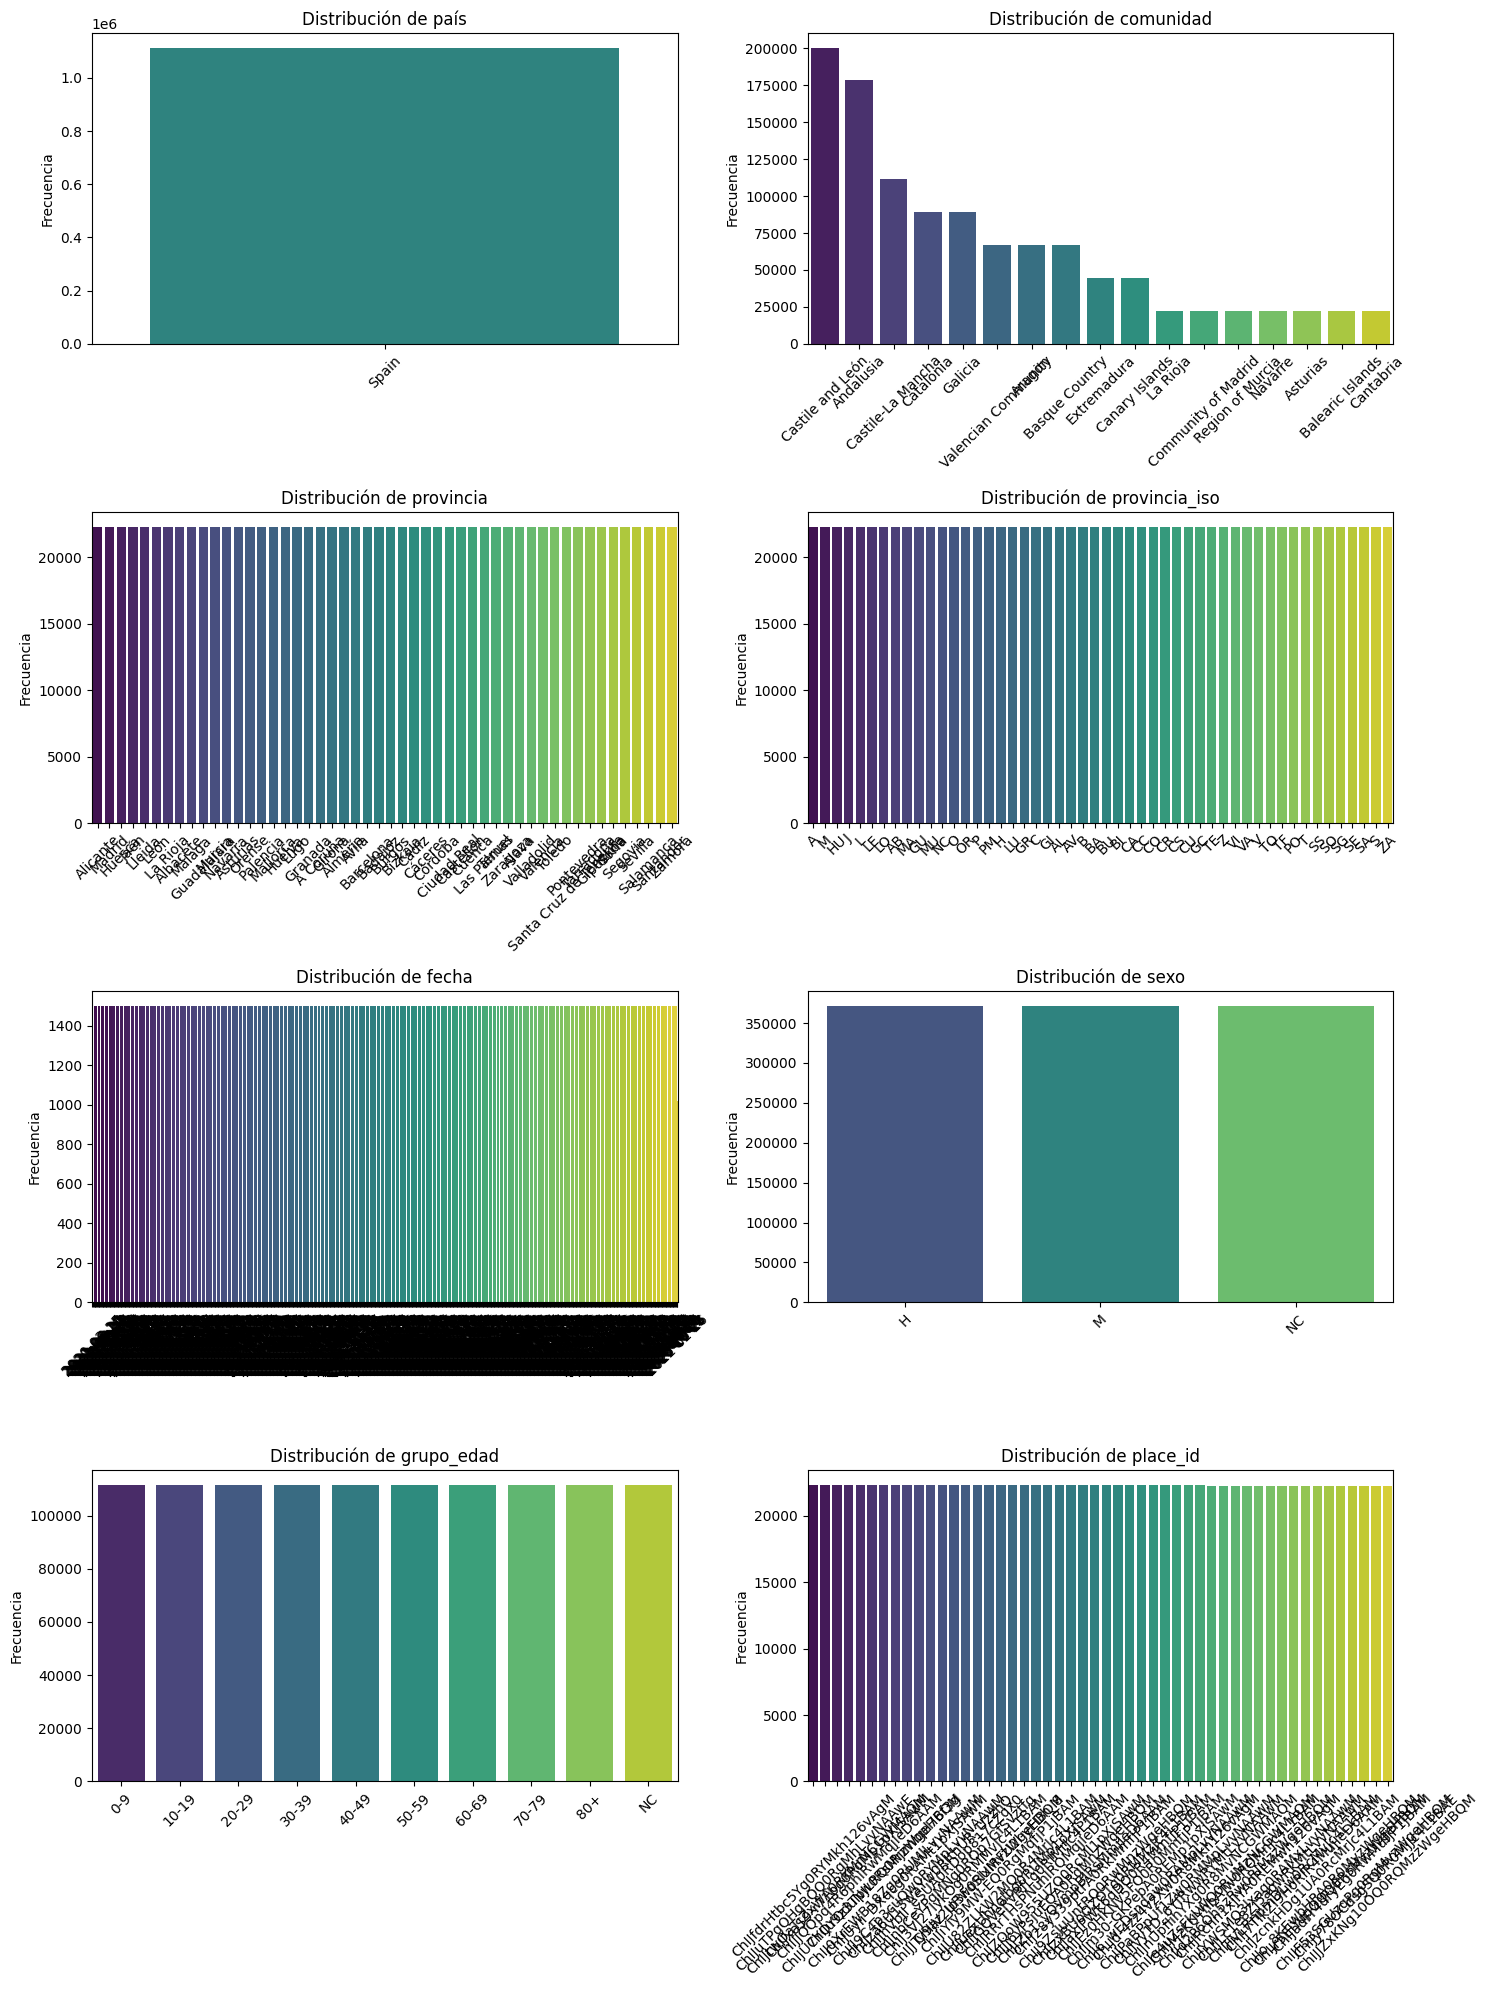

In [9]:
bct.pinta_distribucion_categoricas(df,cat)

In [10]:
num = df_std[df_std['class'].isin(['Numerica Discreta', 'Numerica Continua'])]['name'].tolist()   # Estas son las columnas numéricas
num

['num_casos',
 'num_hosp',
 'num_uci',
 'num_def',
 'comercio_ocio',
 'supermercados_farmacias',
 'parques',
 'estaciones',
 'trabajo',
 'residencia']

In [11]:
for col in num:
    print(f'Para {col} \n{df[col].describe()}', end = '\n\n')

Para num_casos 
count    1.114020e+06
mean     9.738682e+00
std      5.437352e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.000000e+00
max      3.750000e+03
Name: num_casos, dtype: float64

Para num_hosp 
count    1.114020e+06
mean     4.489201e-01
std      2.714000e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.710000e+02
Name: num_hosp, dtype: float64

Para num_uci 
count    1.114020e+06
mean     4.302885e-02
std      3.328867e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.500000e+01
Name: num_uci, dtype: float64

Para num_def 
count    1.114020e+06
mean     9.031615e-02
std      8.662465e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: num_def, dtype: float64

Para comercio_ocio 
count    1.114020e+06
mean    -2.436045e+01
std      2.721011e+01
min     -9.700000e+01
25

(10, 2)


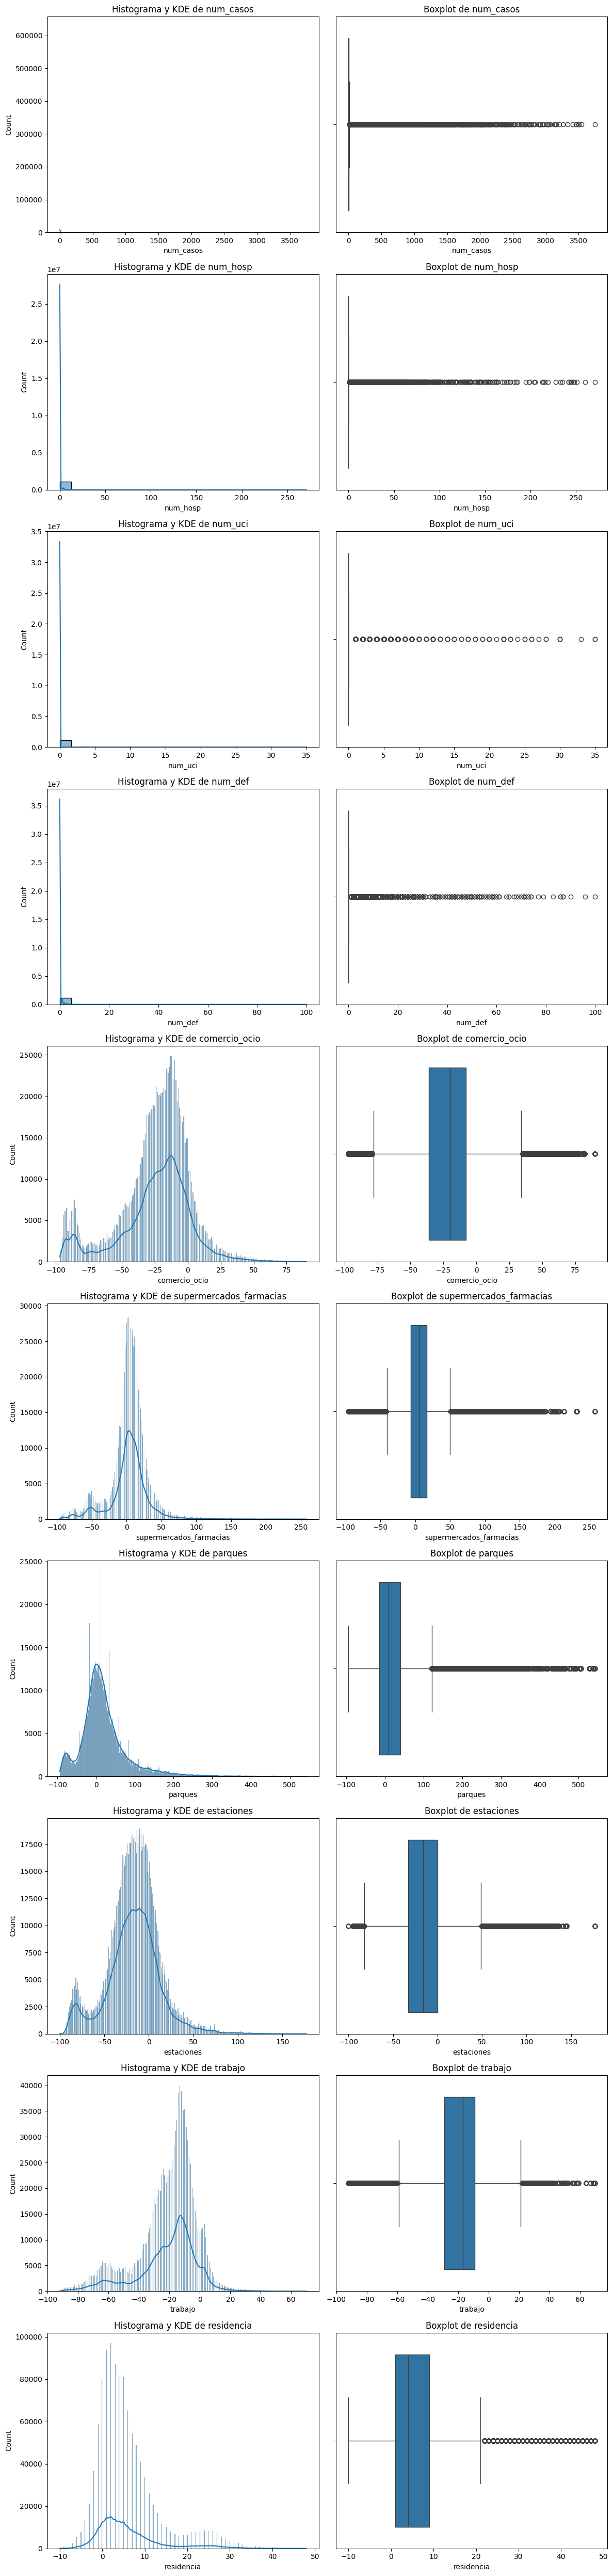

In [12]:
bct.plot_combined_graphs(df,num)

In [13]:
df2 = df[['fecha', 'provincia', 'sexo', 'grupo_edad', 'num_casos', 'num_hosp', 'num_uci', 'num_def', 'comercio_ocio', 'supermercados_farmacias', 'parques', 'estaciones', 'trabajo', 'residencia']]


In [14]:
fp = df2.groupby(['fecha', 'provincia']).agg({'num_casos': 'sum', 'num_hosp': 'sum', 'num_uci': 'sum', 'num_def': 'sum', 'comercio_ocio': 'sum', 'supermercados_farmacias': 'sum', 'parques': 'sum', 'estaciones': 'sum', 'trabajo': 'sum', 'residencia': 'sum'}).sort_values(by ='fecha', ascending = False).reset_index()

# Aquí creamos un sub dataframe que agrupo todo por fecha y provincia.

In [15]:
for col in num:
    print(f'Para {col} \n{fp[col].describe()}', end = '\n\n')

Para num_casos 
count    37134.000000
mean       292.160473
std       1070.825137
min          0.000000
25%         15.000000
50%         63.000000
75%        196.000000
max      34933.000000
Name: num_casos, dtype: float64

Para num_hosp 
count    37134.000000
mean        13.467604
std         45.087080
min          0.000000
25%          1.000000
50%          4.000000
75%         12.000000
max       1932.000000
Name: num_hosp, dtype: float64

Para num_uci 
count    37134.000000
mean         1.290866
std          3.811954
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        135.000000
Name: num_uci, dtype: float64

Para num_def 
count    37134.000000
mean         2.709485
std          9.055097
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        334.000000
Name: num_def, dtype: float64

Para comercio_ocio 
count    37134.000000
mean      -730.813540
std        816.314038
min      -2910.000000
25

(10, 2)


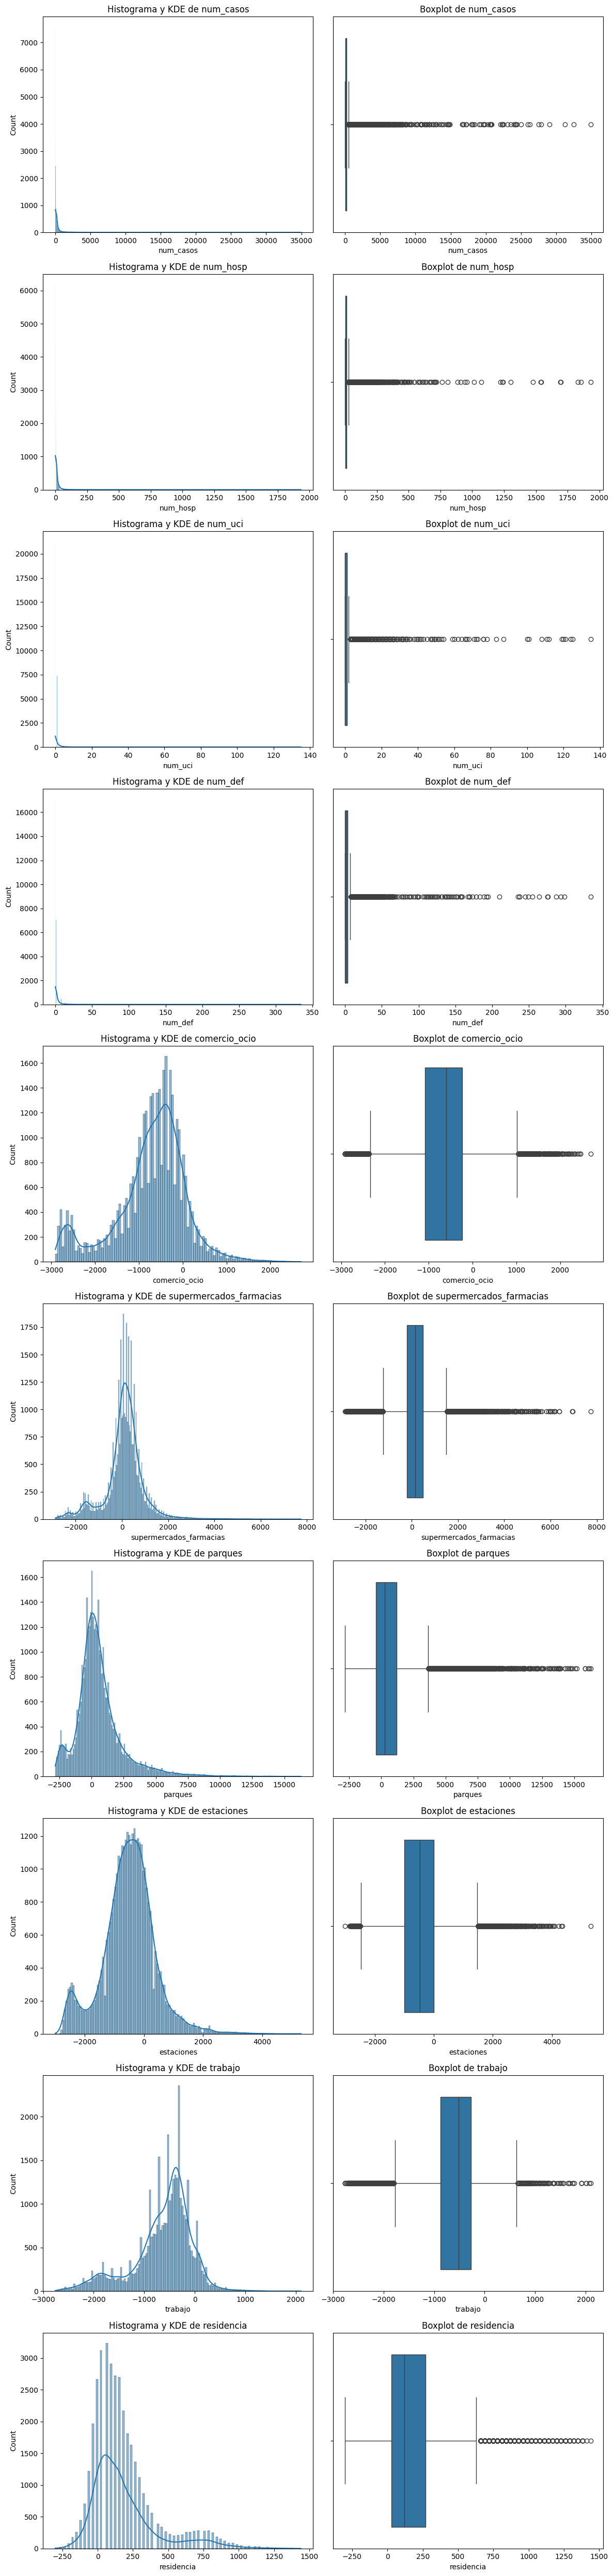

In [16]:
bct.plot_combined_graphs(fp,num)

In [17]:
f = df2.groupby(['fecha']).agg({'num_casos': 'sum', 'num_hosp': 'sum', 'num_uci': 'sum', 'num_def': 'sum', 'comercio_ocio': 'sum', 'supermercados_farmacias': 'sum', 'parques': 'sum', 'estaciones': 'sum', 'trabajo': 'sum', 'residencia': 'sum'}).sort_values(by ='fecha', ascending = True).reset_index()

# Aquí creo un sub Datafrema agrupado todo por fecha.

In [18]:
for col in num:
    print(f'Para {col} \n{f[col].describe()}', end = '\n\n')

Para num_casos 
count       743.000000
mean      14601.732167
std       26340.400060
min           0.000000
25%        2309.000000
50%        6147.000000
75%       13711.000000
max      171621.000000
Name: num_casos, dtype: float64

Para num_hosp 
count     743.000000
mean      673.090175
std       708.309918
min        12.000000
25%       197.000000
50%       514.000000
75%       850.000000
max      5220.000000
Name: num_hosp, dtype: float64

Para num_uci 
count    743.000000
mean      64.515478
std       64.904840
min        0.000000
25%       19.000000
50%       54.000000
75%       83.000000
max      502.000000
Name: num_uci, dtype: float64

Para num_def 
count    743.000000
mean     135.415882
std      161.435076
min        0.000000
25%       27.000000
50%       78.000000
75%      182.000000
max      898.000000
Name: num_def, dtype: float64

Para comercio_ocio 
count       743.000000
mean     -36524.939435
std       37586.627270
min     -144090.000000
25%      -52950.000000
50%    

(10, 2)


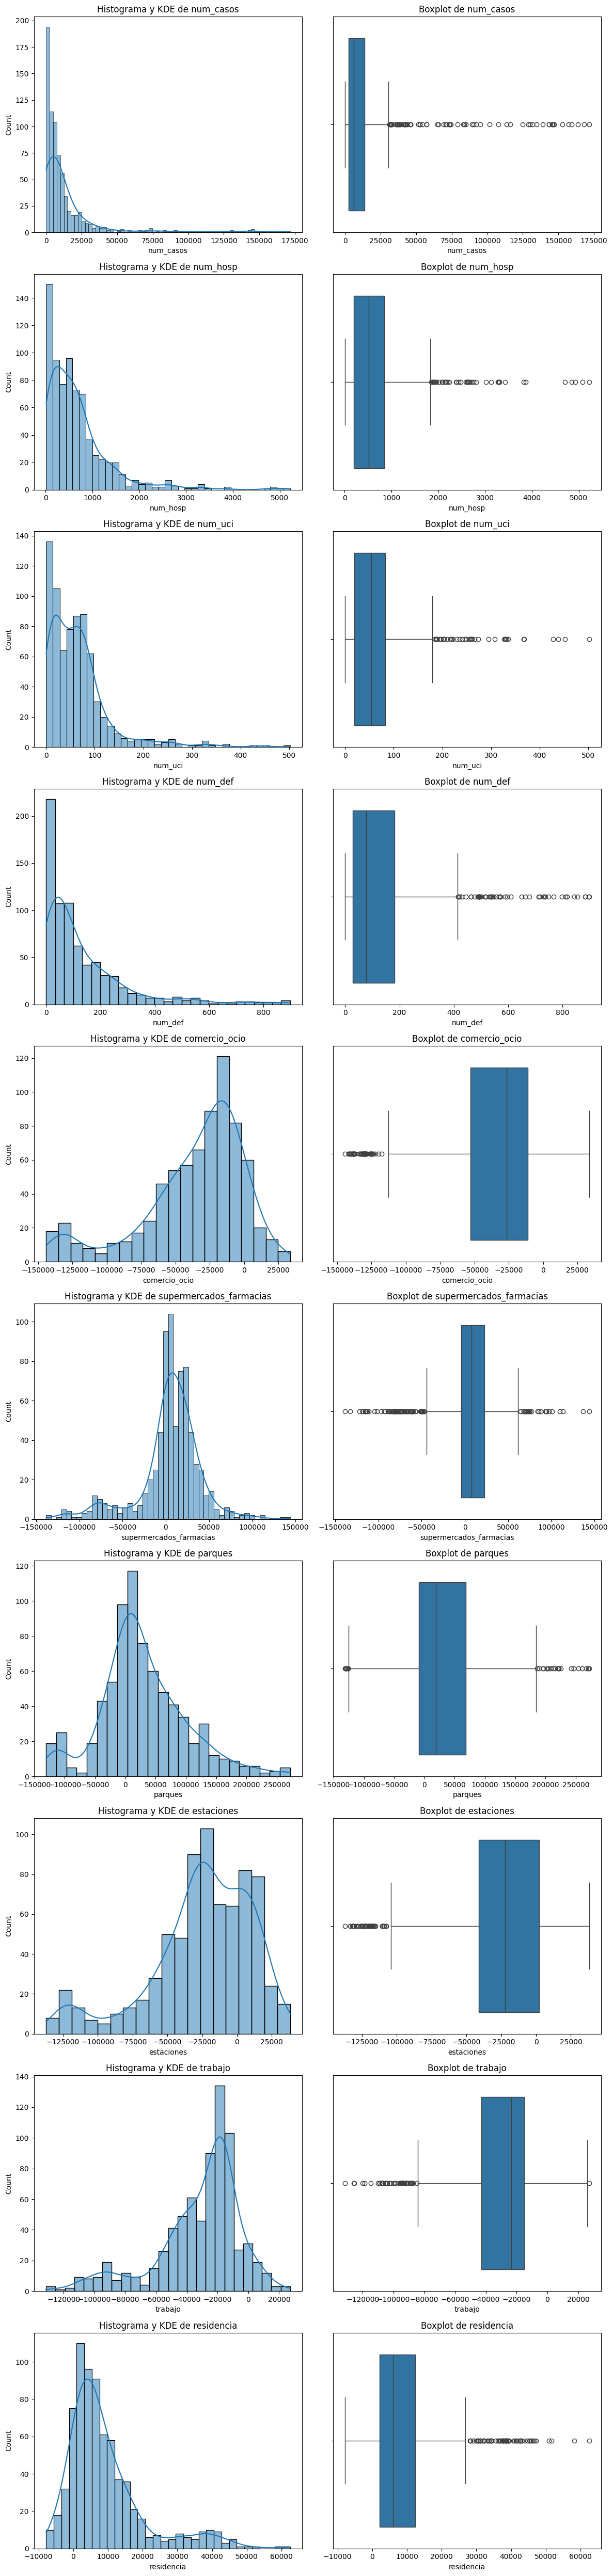

In [19]:
bct.plot_combined_graphs(f,num)

In [20]:
f

fecha  num_casos  num_hosp  num_uci  num_def  comercio_ocio  \
0   2020-02-15          0        12        3        0         6210.0   
1   2020-02-16          0        12        1        0         6120.0   
2   2020-02-17          0        26        3        0         -930.0   
3   2020-02-18          0        27        1        0        -1140.0   
4   2020-02-19          0        38        3        0          240.0   
..         ...        ...       ...      ...      ...            ...   
738 2022-02-22      21725       429       16      126       -15270.0   
739 2022-02-23      20600       426       25       95       -17190.0   
740 2022-02-24      18016       388       21       99       -15930.0   
741 2022-02-25      16128       379       20       97       -19140.0   
742 2022-02-26       6220       207       15       60       -12480.0   

     supermercados_farmacias  parques  estaciones  trabajo  residencia  
0                    -1260.0  43410.0     13020.0    450.0     -2940.0  
1                     2130.0  25740.0     14490.0   -390.0     -3150.0  
2                     2670.0   9150.0      5760.0   6180.0     -1230.0  
3                     -870.0  12840.0      3030.0   6030.0     -1080.0  
4                      -30.0  21030.0      3270.0   5550.0     -1230.0  
..                       ...      ...         ...      ...         ...  
738                  18870.0  49380.0      5460.0 -10710.0      1590.0  
739                  19440.0  40380.0      3540.0 -10560.0      2370.0  
740                  20010.0  28620.0      5850.0 -11970.0      2400.0  
741                  22380.0  20130.0      5940.0 -15480.0      3630.0  
742                   9090.0  31110.0      3810.0  -7380.0      1020.0  

[743 rows x 11 columns]

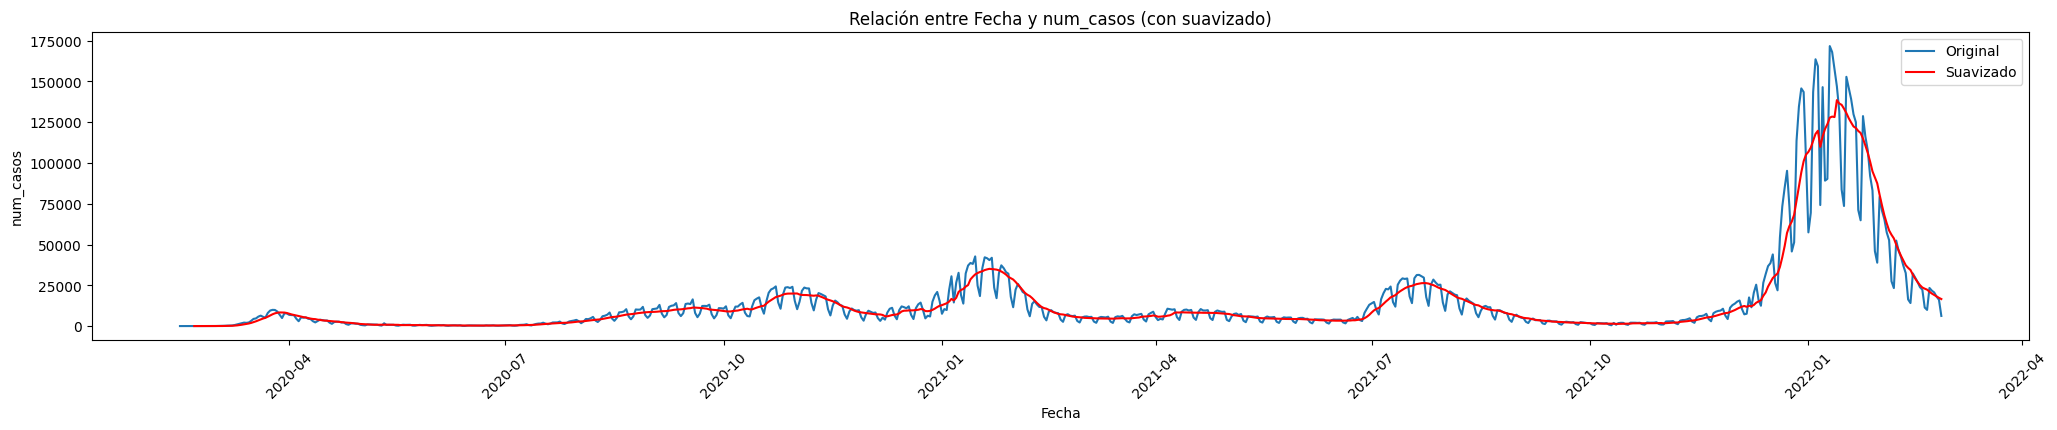

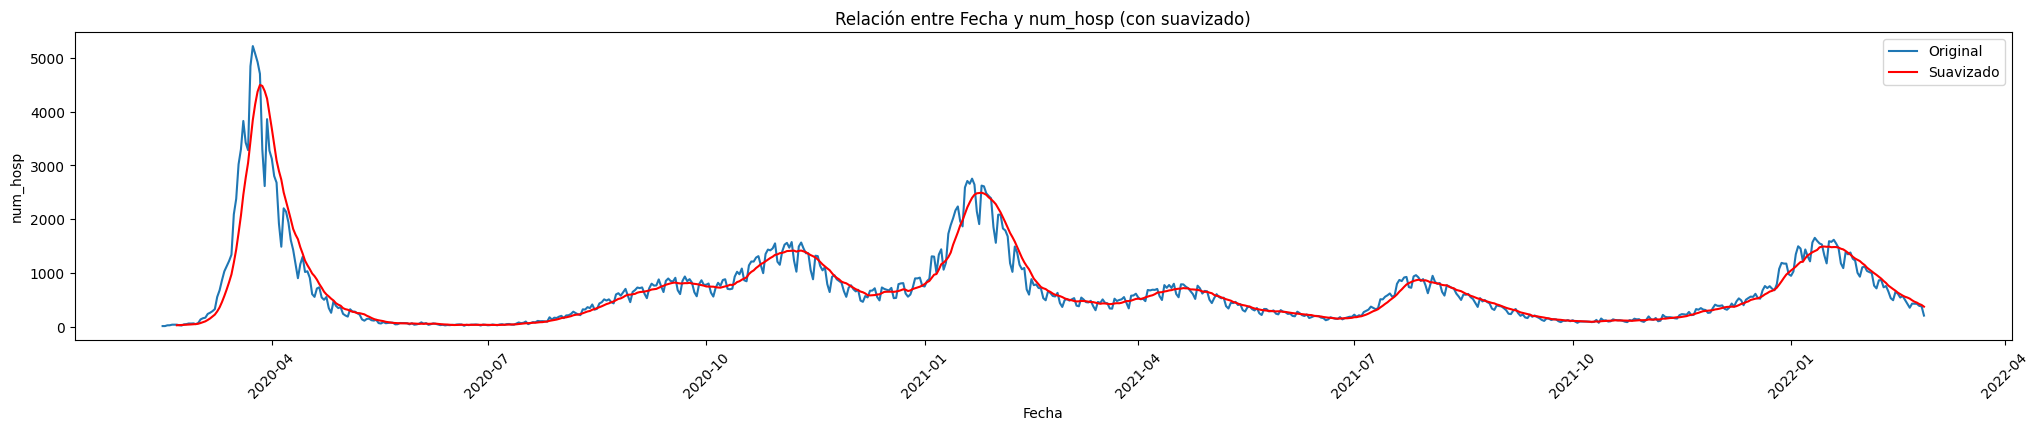

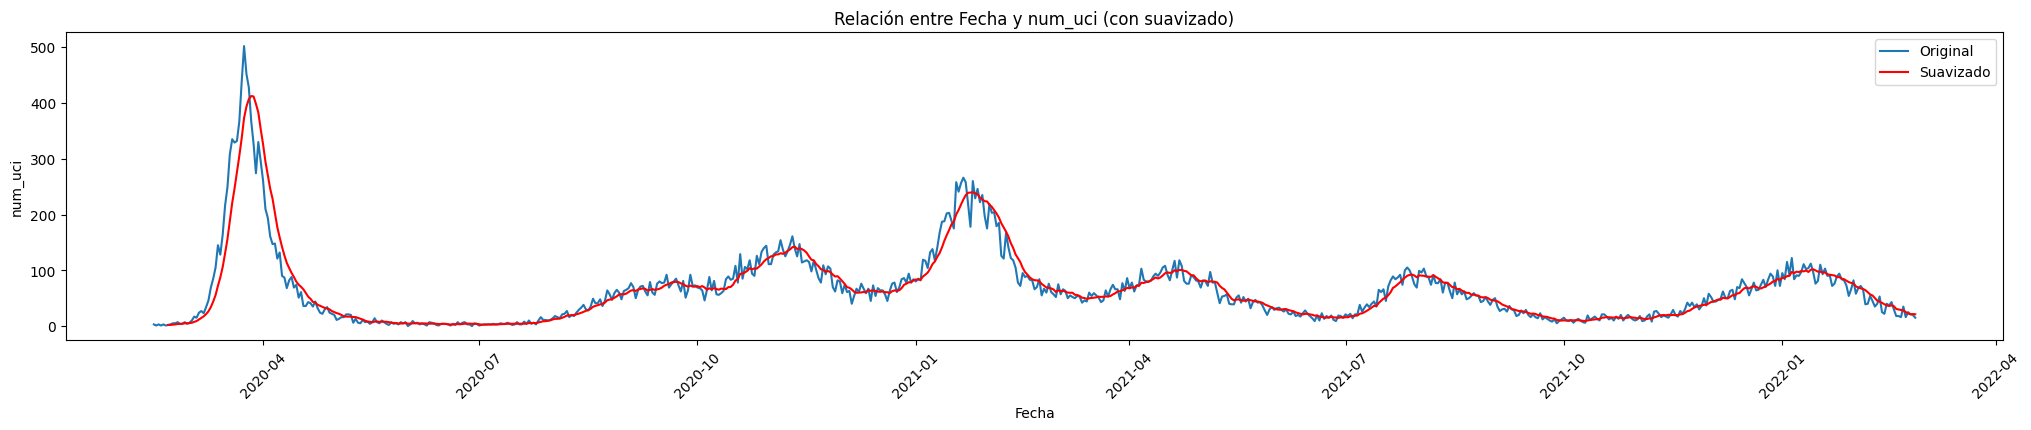

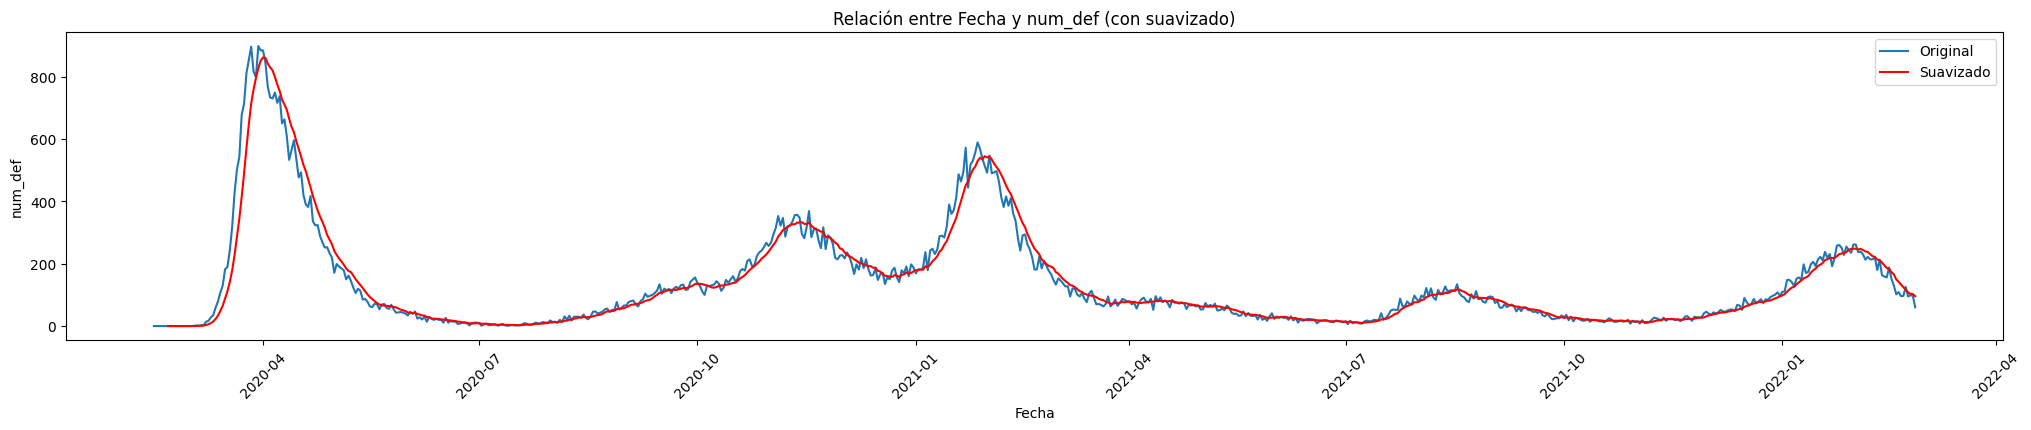

In [21]:
ventana = 7

for col in num[:4]:
    f[f'{col}_suavizado'] = f[col].rolling(window=ventana).mean()

    # Gráfica de los datos originales
    plt.figure(figsize=(25, 4))
    plt.plot(f['fecha'], f[col], label='Original')

    # Gráfica de los datos suavizados
    plt.plot(f['fecha'], f[f'{col}_suavizado'], label='Suavizado', color='red')

    plt.xlabel('Fecha')
    plt.ylabel(col)
    plt.title(f'Relación entre Fecha y {col} (con suavizado)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


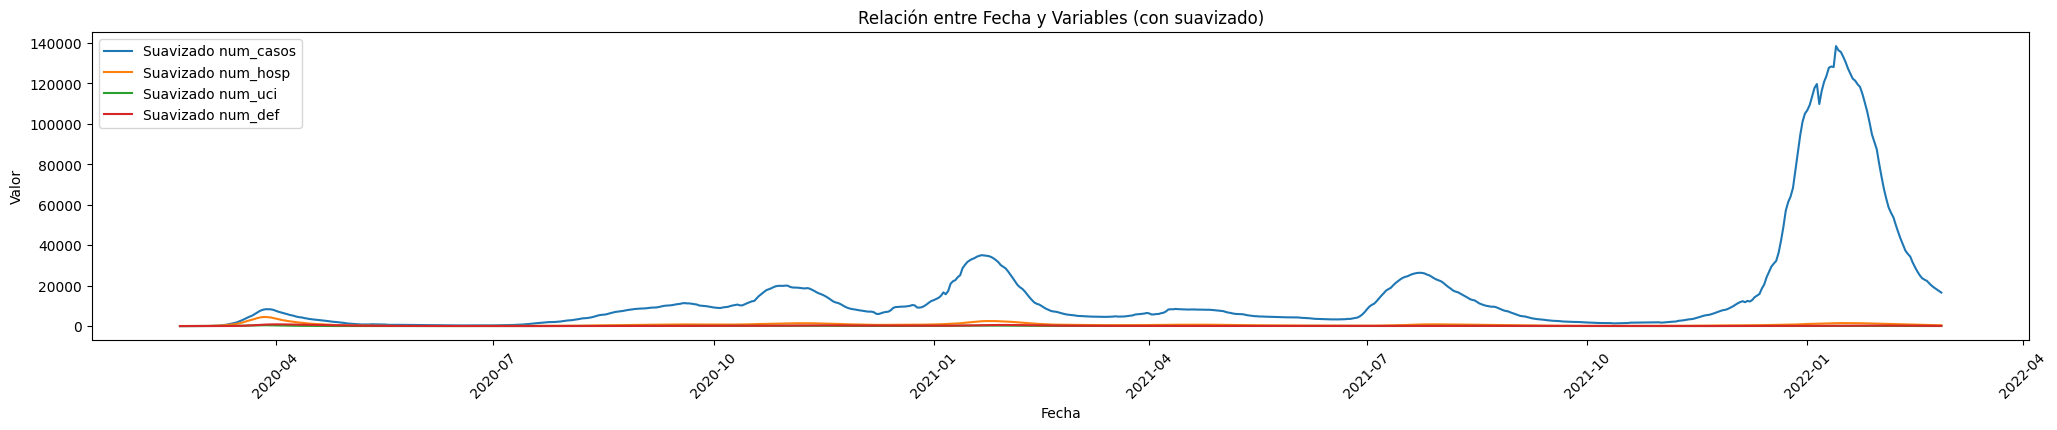

In [22]:
ventana = 7
plt.figure(figsize=(25, 4))

for col in num[:4]:
    # Calcula el promedio móvil
    f[f'{col}_suavizado'] = f[col].rolling(window=ventana).mean()

    # Gráfica de los datos suavizados en el mismo gráfico
    plt.plot(f['fecha'], f[f'{col}_suavizado'], label=f'Suavizado {col}')

plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Relación entre Fecha y Variables (con suavizado)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

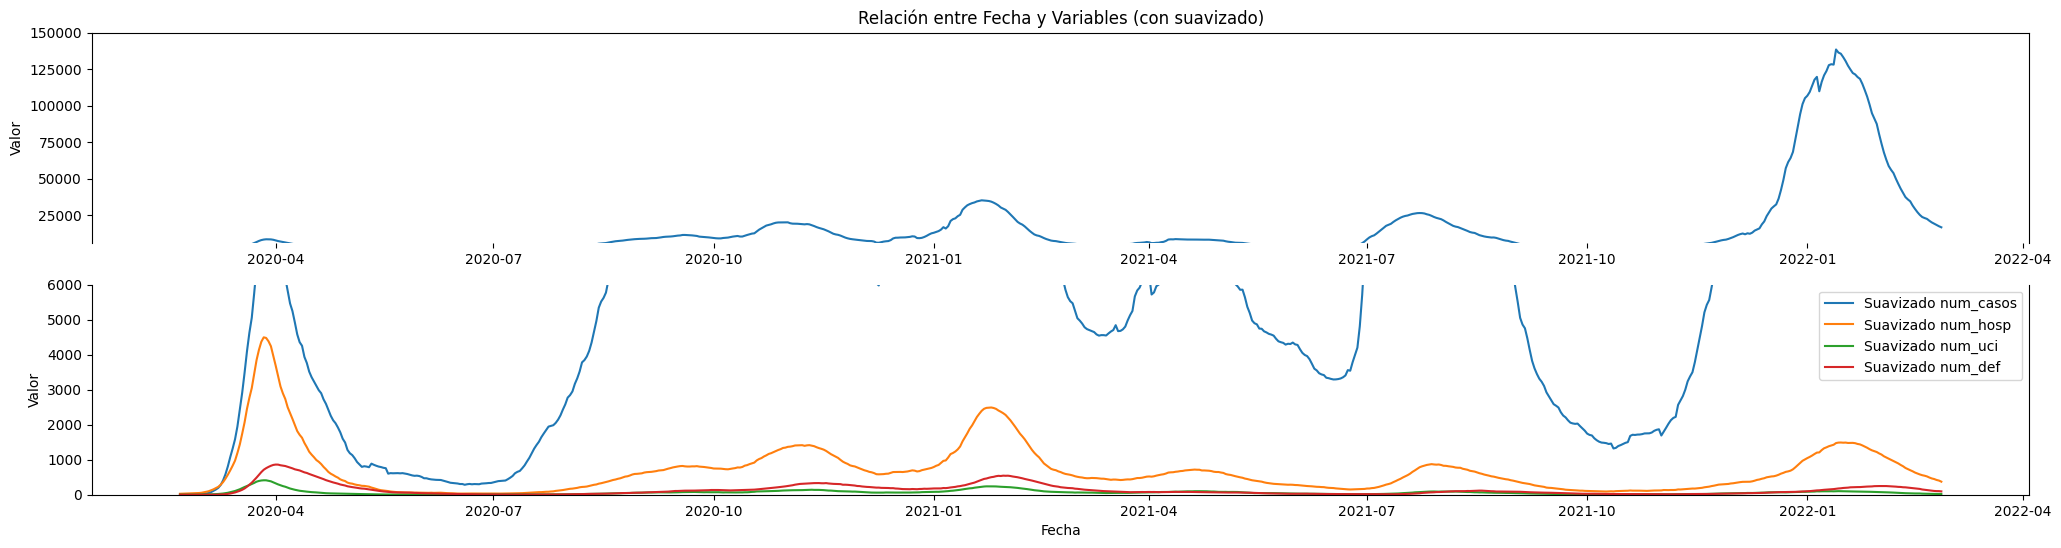

In [23]:

ventana = 7
f['num_casos_suavizado'] = f['num_casos'].rolling(window=ventana).mean()

# Definir la configuración de los subgráficos
fig = plt.figure(figsize=(25, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

# Primer subgráfico (0 a 10000)
ax0 = plt.subplot(gs[0])
ax0.set_ylim(6000, 150000)

# Segundo subgráfico (10000 a 150000)
ax1 = plt.subplot(gs[1])
ax1.set_ylim(0, 6000)

# Asegurarse de que los ejes se alinean correctamente
ax0.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

for col in num[:4]:
    f[f'{col}_suavizado'] = f[col].rolling(window=ventana).mean()
    ax0.plot(f['fecha'], f[f'{col}_suavizado'], label=f'Suavizado {col}')
    ax1.plot(f['fecha'], f[f'{col}_suavizado'], label=f'Suavizado {col}')

ax0.set_ylabel('Valor')
ax0.set_title('Relación entre Fecha y Variables (con suavizado)')
ax1.legend()

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Valor')
ax1.xaxis.set_tick_params(rotation=0)

plt.show()

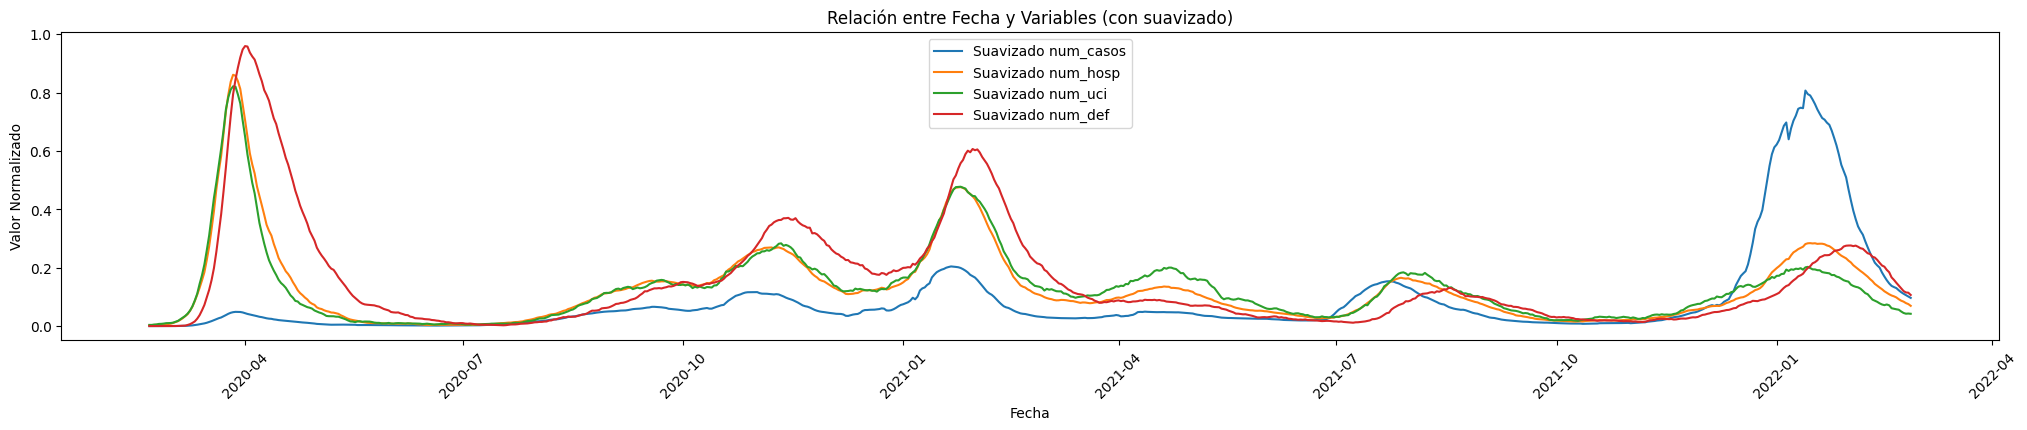

In [24]:
ventana = 7
plt.figure(figsize=(25, 4))

for col in num[:4]:
    # Calcula el promedio móvil
    f[f'{col}_suavizado'] = f[col].rolling(window=ventana).mean()

    # Normalizar los datos suavizados
    min_val = f[col].min()
    max_val = f[col].max()
    f[f'{col}_suavizado_normalizado'] = (f[f'{col}_suavizado'] - min_val) / (max_val - min_val)

    # Gráfica de los datos suavizados en el mismo gráfico
    plt.plot(f['fecha'], f[f'{col}_suavizado_normalizado'], label=f'Suavizado {col}')

plt.xlabel('Fecha')
plt.ylabel('Valor Normalizado')
plt.title('Relación entre Fecha y Variables (con suavizado)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

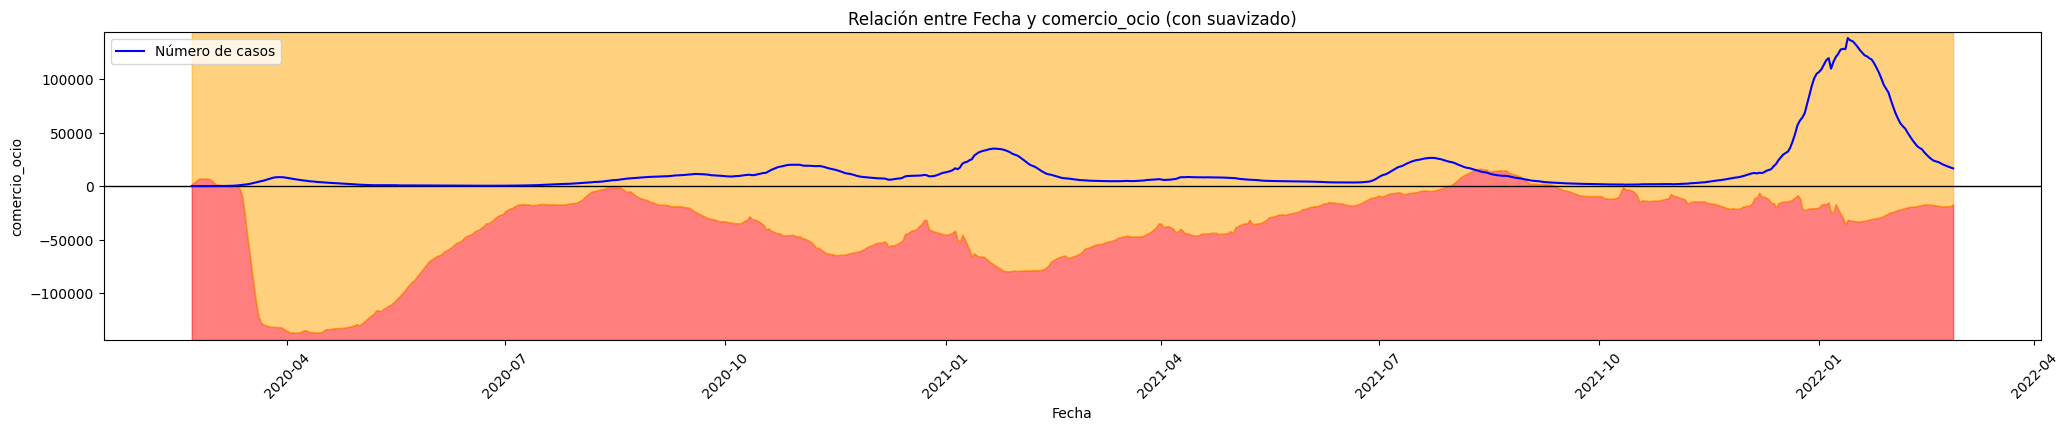

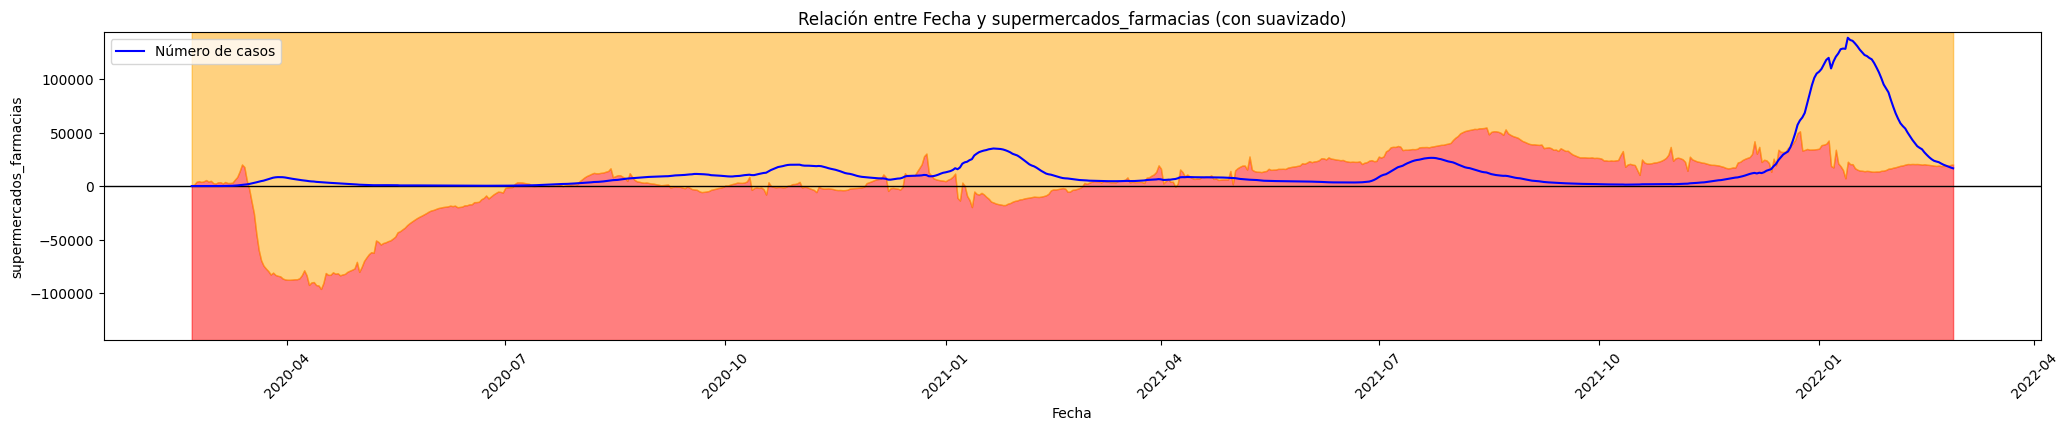

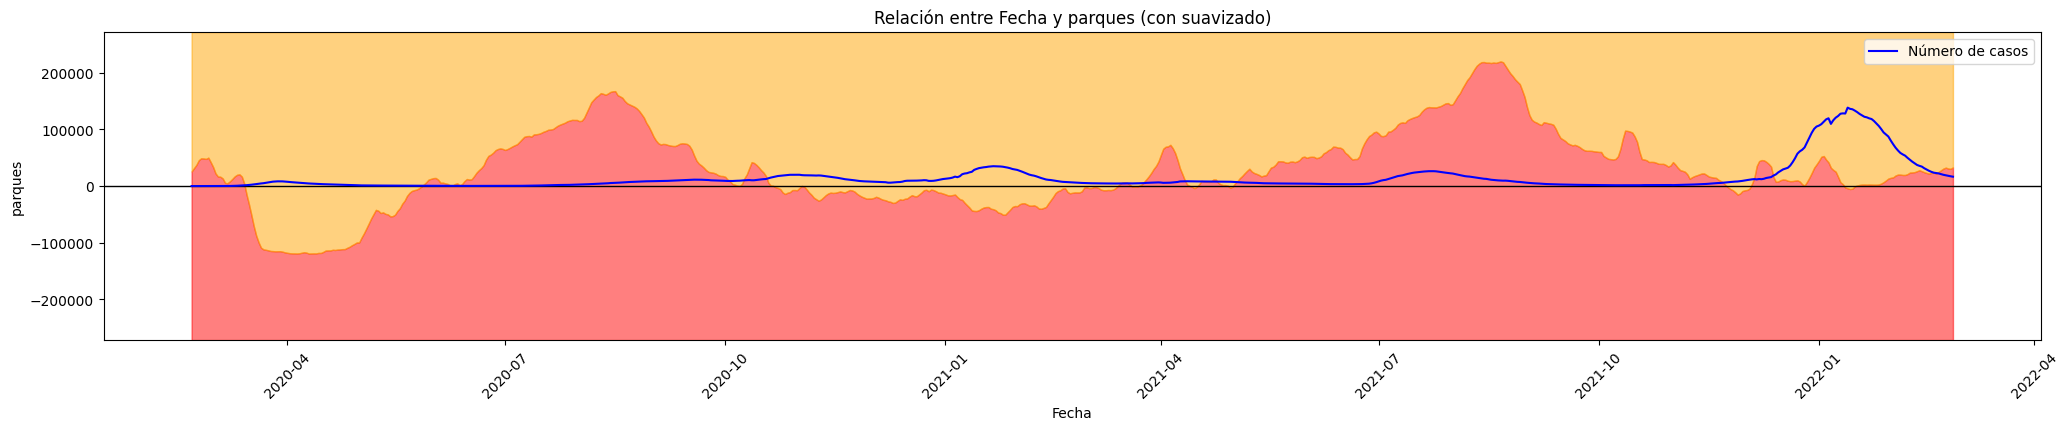

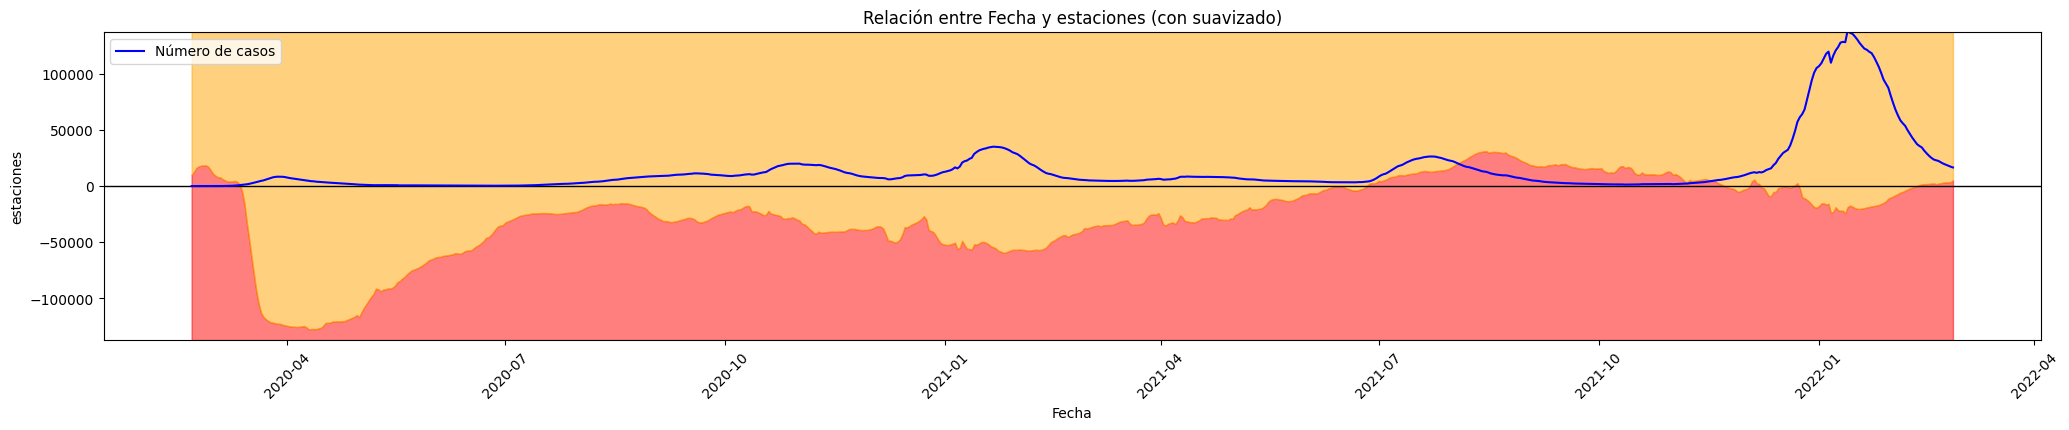

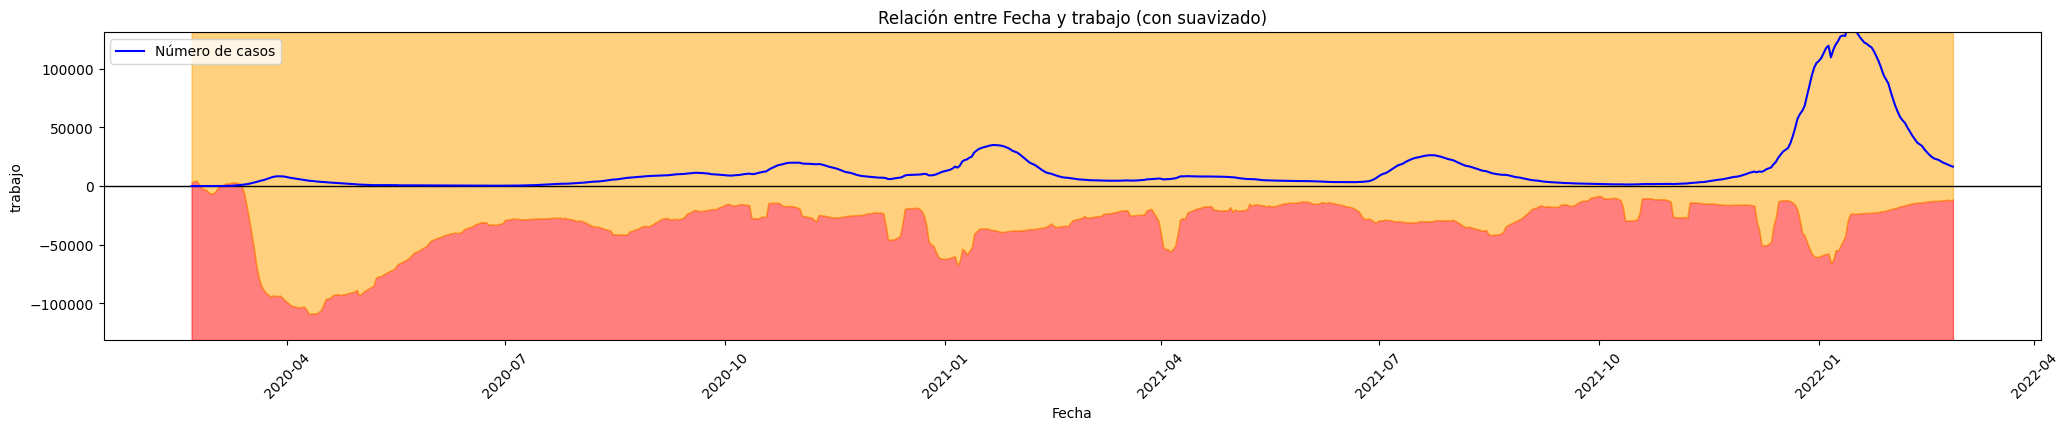

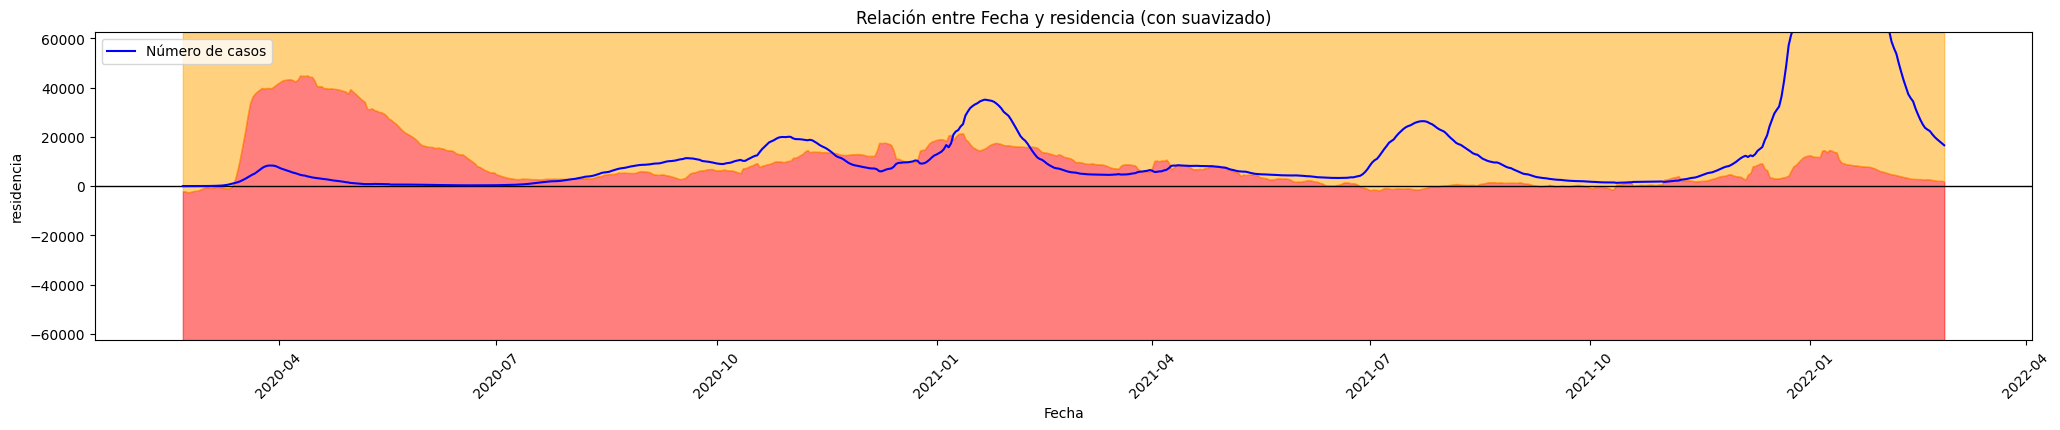

In [25]:
ventana = 7
f['num_casos_suavizado'] = f['num_casos'].rolling(window=ventana).mean()

for col in num[4:]:
    # Calcula el promedio móvil
    f[f'{col}_suavizado'] = f[col].rolling(window=ventana).mean()

    # Encuentra el valor máximo absoluto entre el mínimo y el máximo para ajustar el eje y
    max_val = max(f[col].max(), abs(f[col].min()))

    plt.figure(figsize=(25, 4))

    # Área desde la línea de suavizado hasta -max_val (rojo)
    plt.fill_between(f['fecha'], f[f'{col}_suavizado'], -max_val, color='red', alpha=0.5)

    # Área desde la línea de suavizado hasta max_val (naranja)
    plt.fill_between(f['fecha'], f[f'{col}_suavizado'], max_val, color='orange', alpha=0.5)

    # Añadir una línea horizontal en el 0
    plt.axhline(0, color='black', linewidth=1)

    plt.plot(f['fecha'], f['num_casos_suavizado'], label='Número de casos', color='blue')

    plt.xlabel('Fecha')
    plt.ylabel(col)
    plt.title(f'Relación entre Fecha y {col} (con suavizado)')
    plt.xticks(rotation=45)
    plt.ylim(-max_val, max_val)
    plt.legend()
    plt.show()

In [26]:
selected_cols = f[num[4:]]

# Calcular el valor máximo absoluto entre todas las columnas seleccionadas
max_abs_value = selected_cols.abs().max().max()

print(max_abs_value)

271950.0


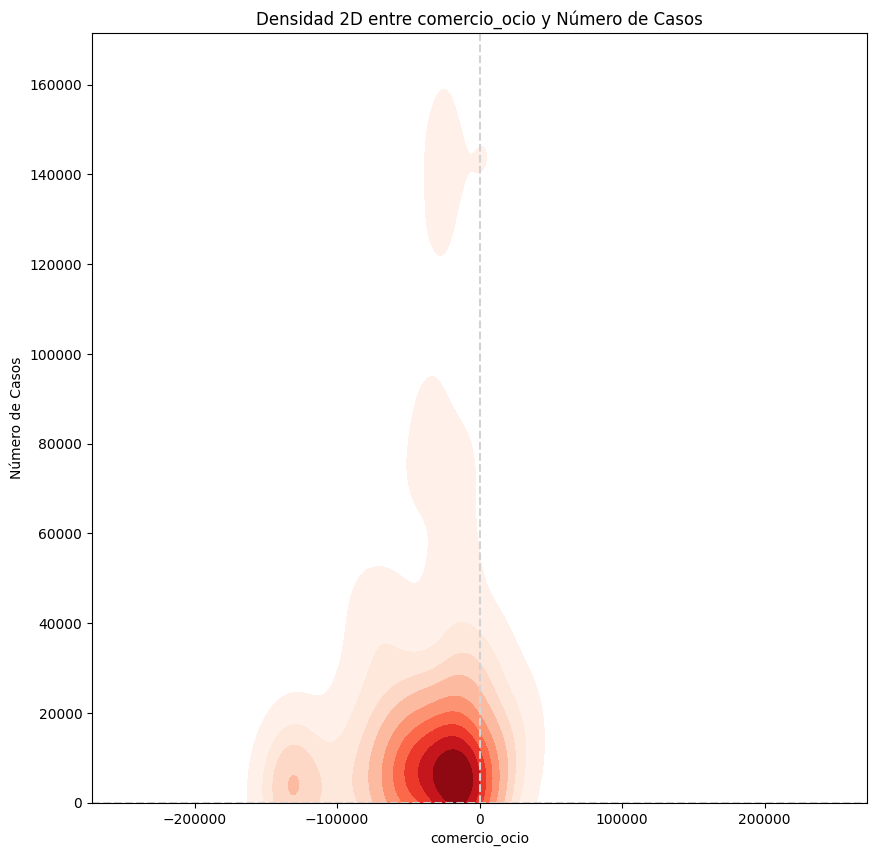

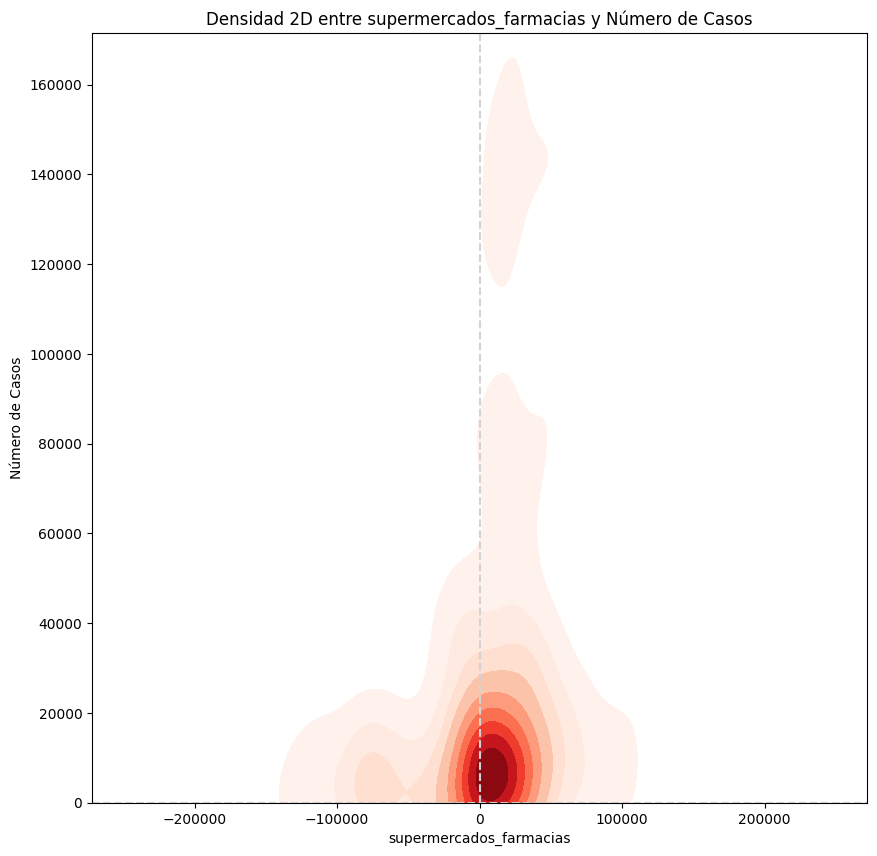

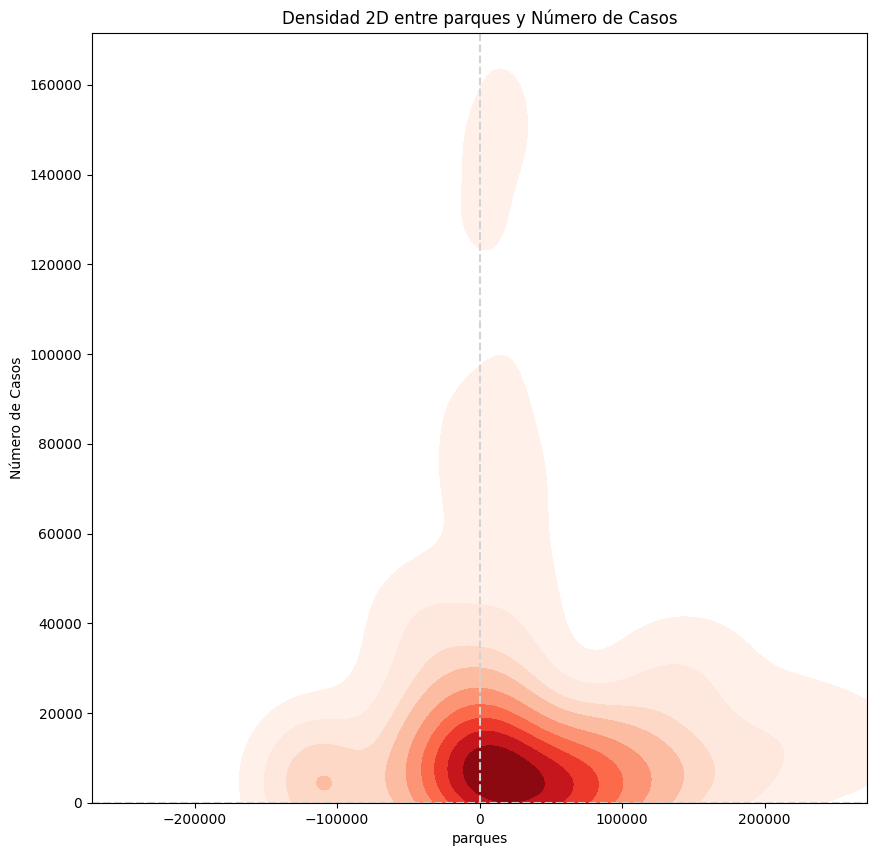

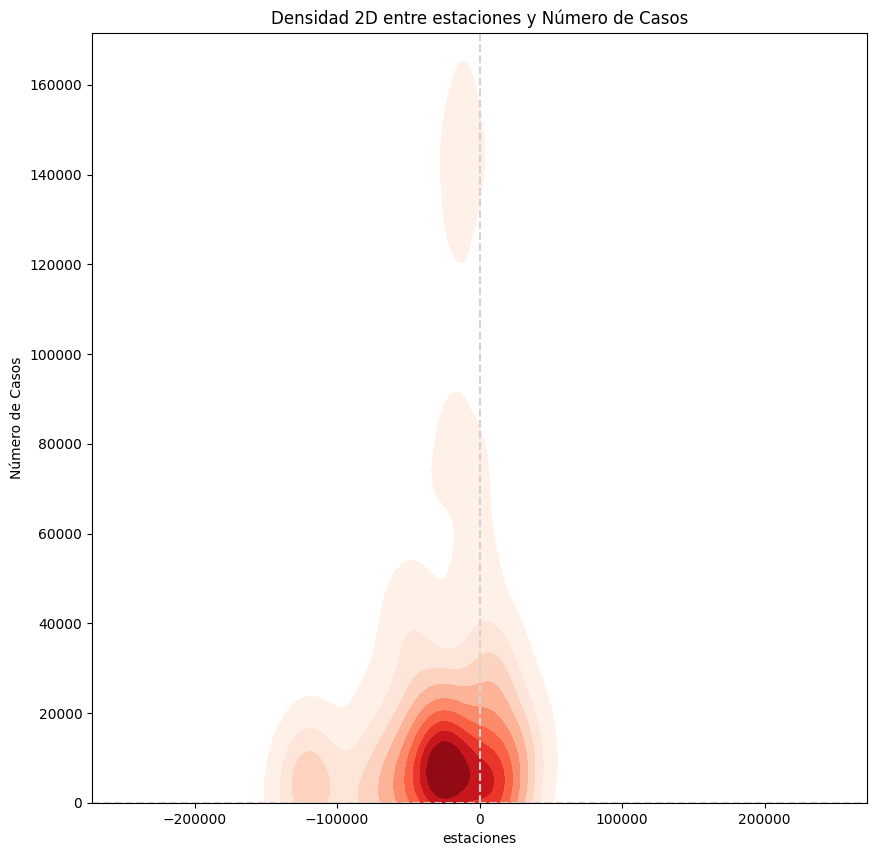

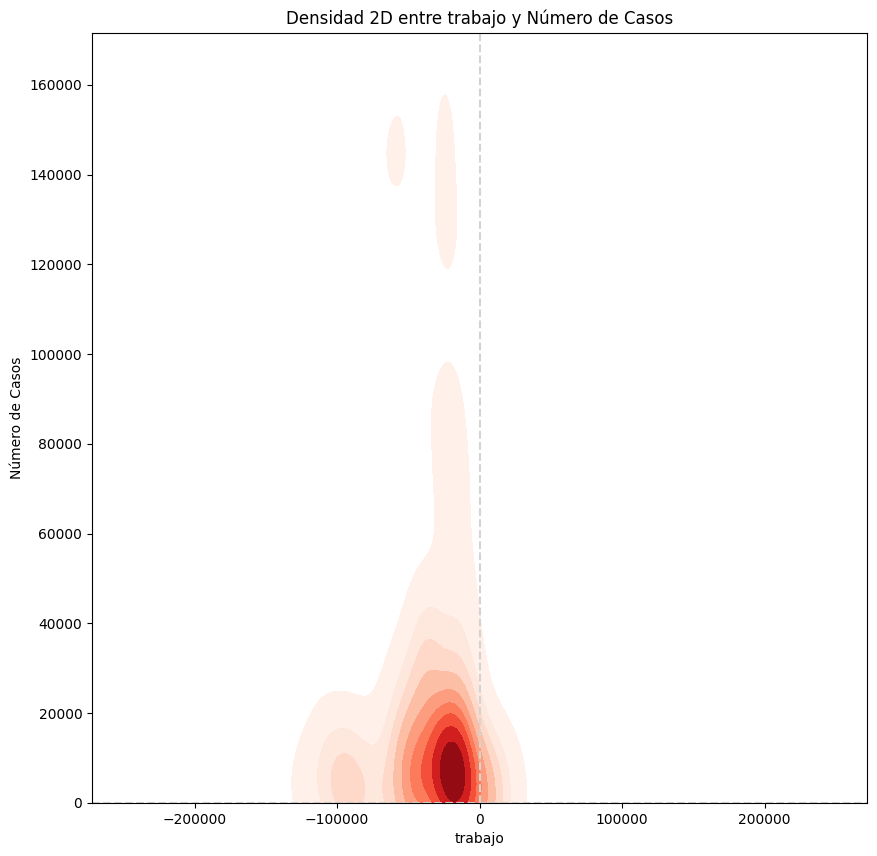

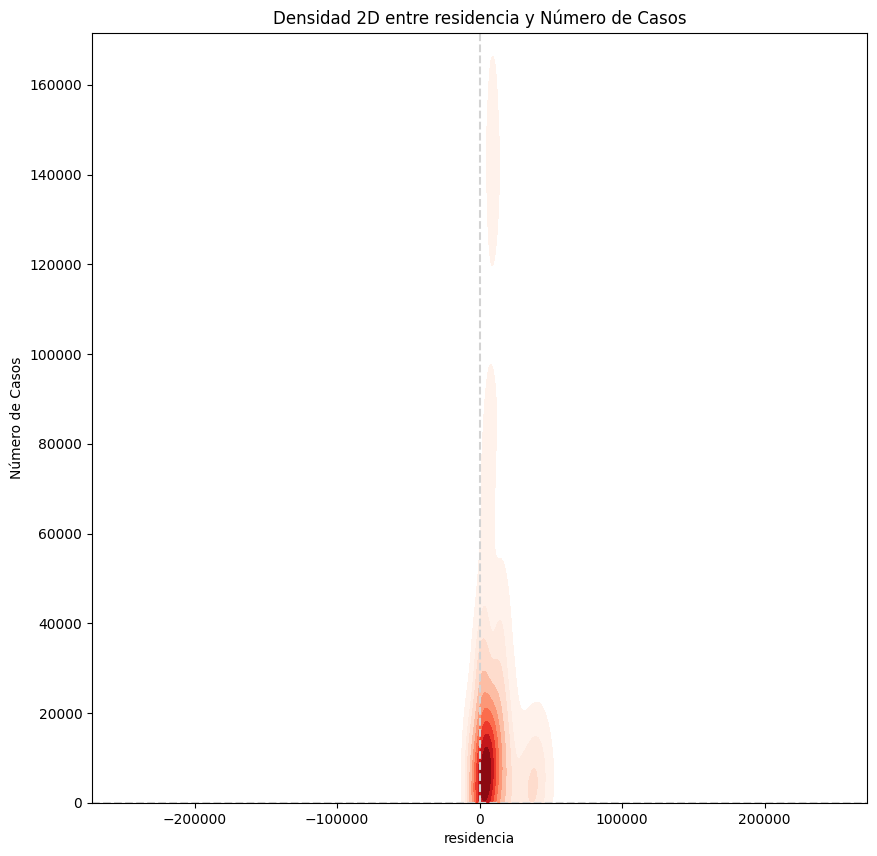

In [27]:
# Límites para los ejes
limite_ejes = max_abs_value  # valor obtenido anteriormente
max_num_casos = f['num_casos'].max()

for col in num[4:]:
    # Crea un gráfico 2D Density Plot para cada columna en la lista
    plt.figure(figsize=(10, 10))
    sns.kdeplot(data=f, x=col, y='num_casos', cmap="Reds", fill=True)

    # Establecer límites fijos y simétricos para el eje x
    plt.xlim(-limite_ejes, limite_ejes)

    # Establecer límites para el eje y desde 0 hasta el máximo de 'num_casos'
    plt.ylim(0, max_num_casos)

    # Añade líneas en el 0 de ambos ejes
    plt.axhline(0, color='lightgray', linestyle='--')
    plt.axvline(0, color='lightgray', linestyle='--')

    # Añade etiquetas y título
    plt.xlabel(col)
    plt.ylabel('Número de Casos')
    plt.title(f'Densidad 2D entre {col} y Número de Casos')

    plt.show()



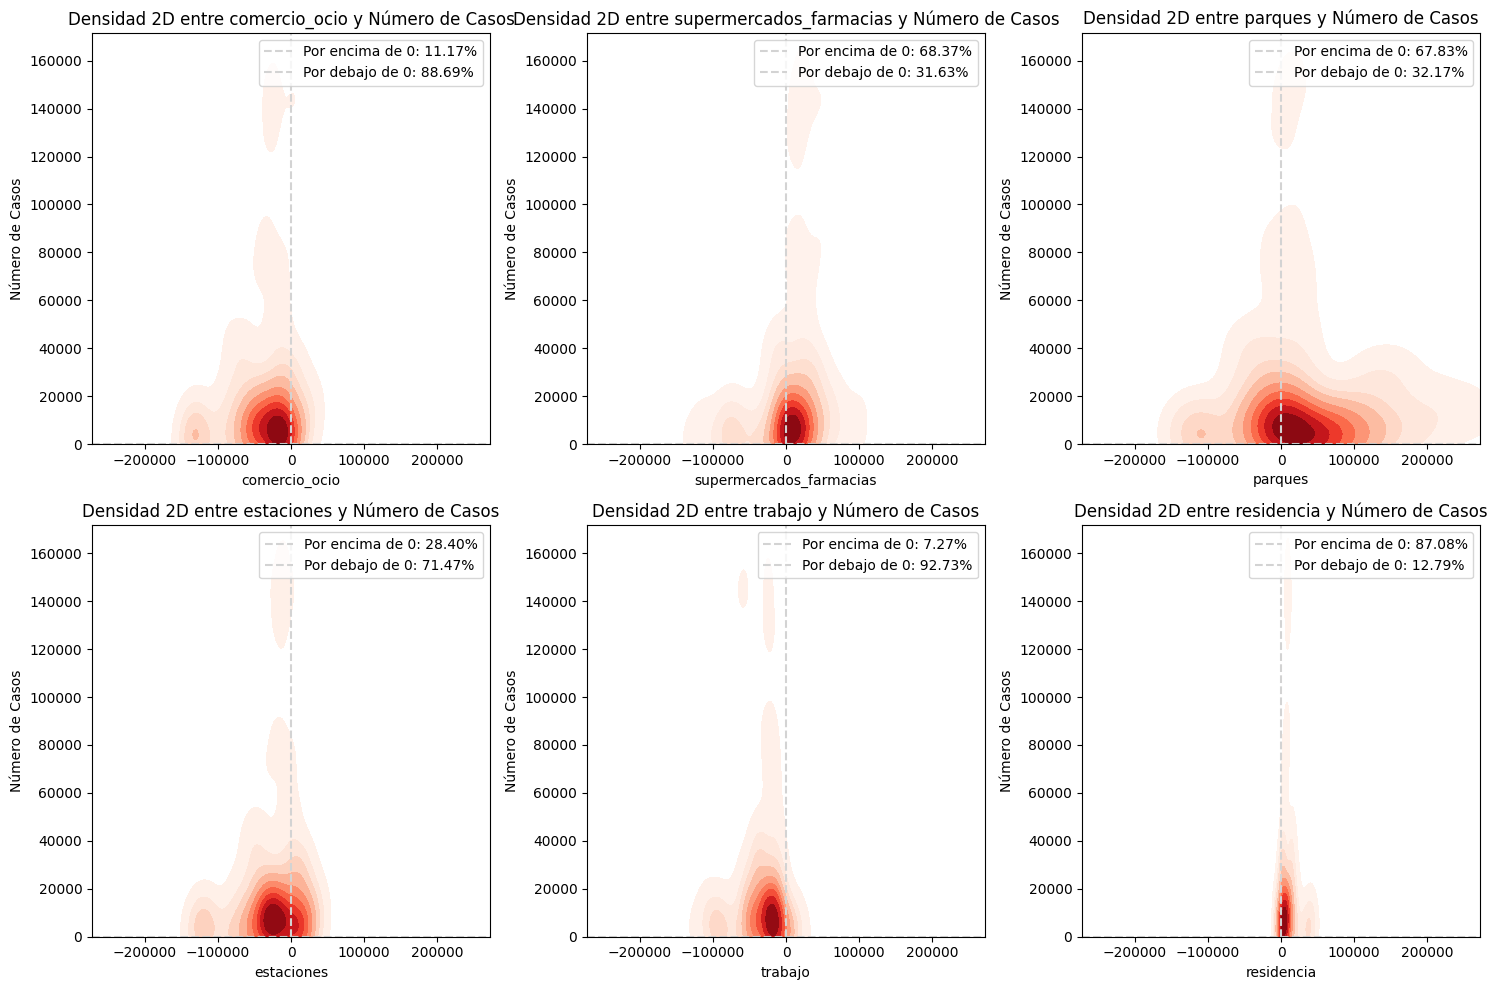

In [28]:
# Número de filas y columnas para la matriz de subgráficos
n_filas = 2
n_columnas = 3

# Crea una figura y una matriz de ejes (subplots)
fig, axes = plt.subplots(nrows=n_filas, ncols=n_columnas, figsize=(15, 10))

# Itera a través de las columnas y dibuja cada gráfico en un eje
for i, col in enumerate(num[4:]):
    ax = axes[i // n_columnas, i % n_columnas]
    sns.kdeplot(data=f, x=col, y='num_casos', cmap="Reds", fill=True, ax=ax)

    # Calcular los porcentajes de valores por encima y por debajo del 0
    porcentaje_por_encima = np.mean(f[col] > 0) * 100
    porcentaje_por_debajo = np.mean(f[col] < 0) * 100

    # Establece los límites para cada subplot
    ax.set_xlim(-limite_ejes, limite_ejes)
    ax.set_ylim(0, max_num_casos)

    # Añade líneas en el 0 de ambos ejes
    ax.axhline(0, color='lightgray', linestyle='--')
    ax.axvline(0, color='lightgray', linestyle='--')

    # Añade etiquetas, título y leyenda para cada subplot
    ax.set_xlabel(col)
    ax.set_ylabel('Número de Casos')
    ax.set_title(f'Densidad 2D entre {col} y Número de Casos')
    ax.legend([f'Por encima de 0: {porcentaje_por_encima:.2f}%', 
               f'Por debajo de 0: {porcentaje_por_debajo:.2f}%'])

# Ajusta el layout para evitar la superposición de los subplots
plt.tight_layout()

# Muestra la figura completa con todos los subplots
plt.show()



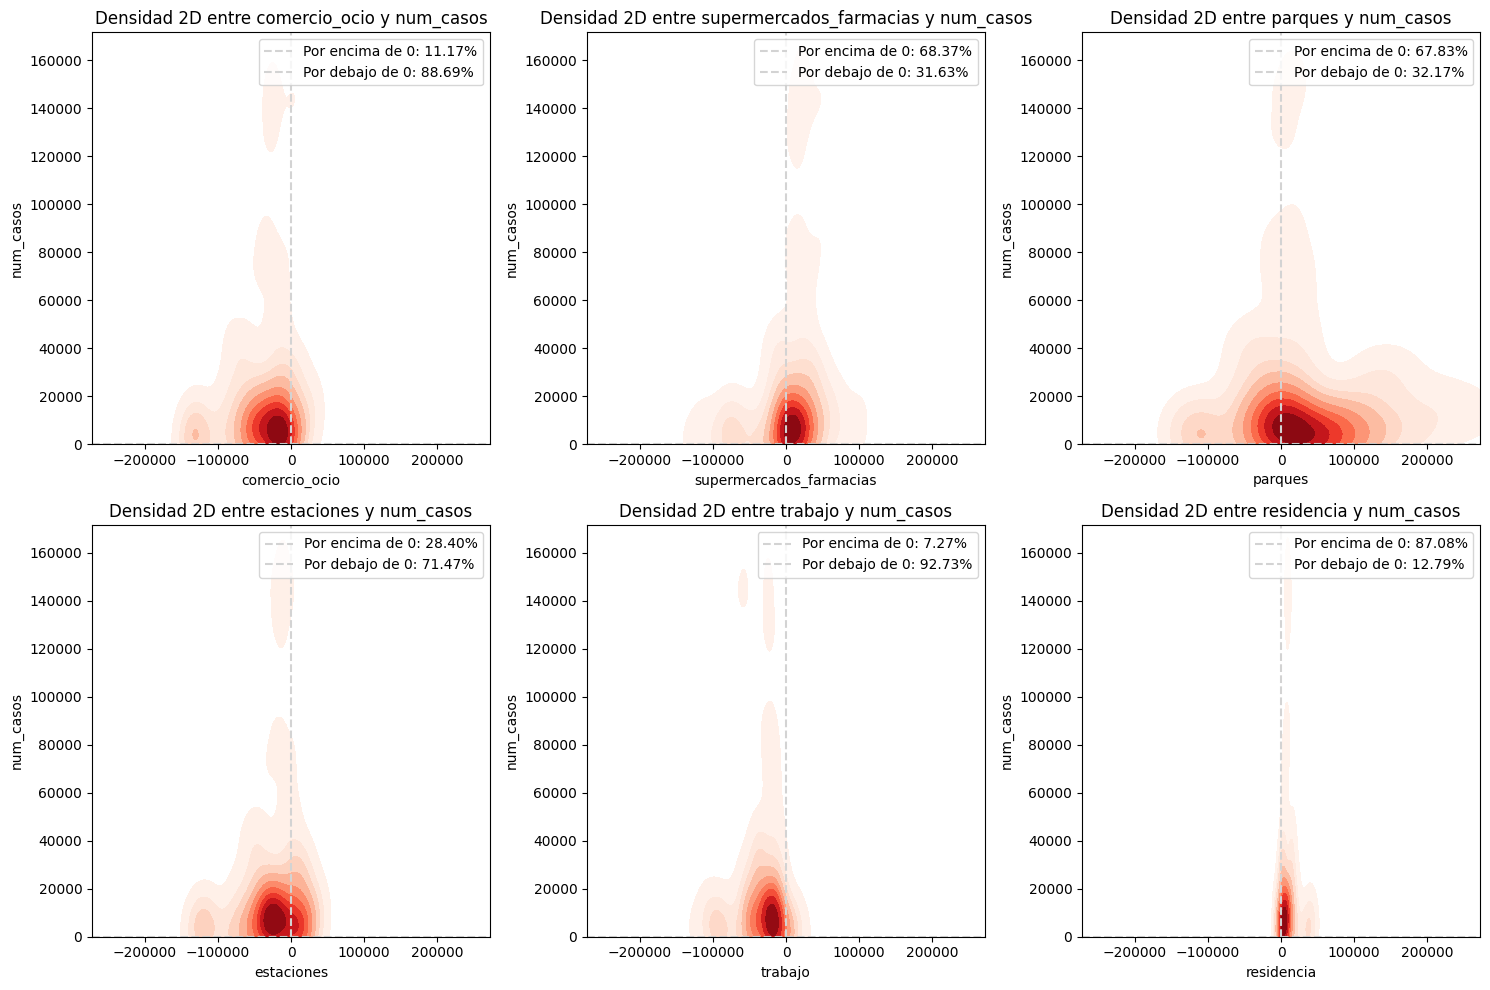

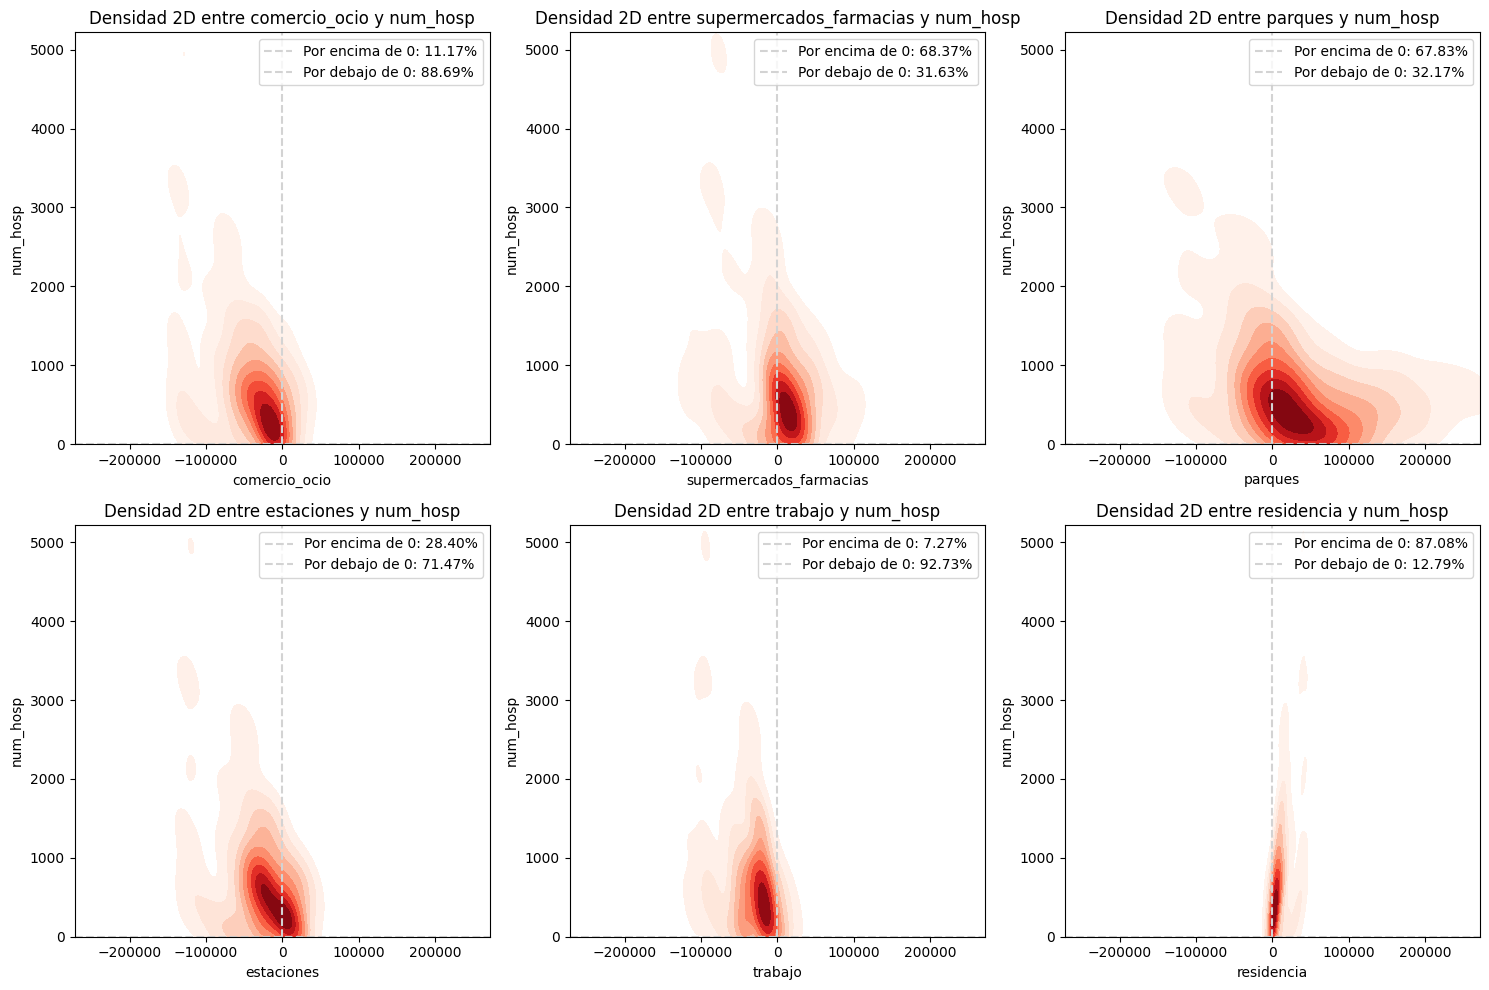

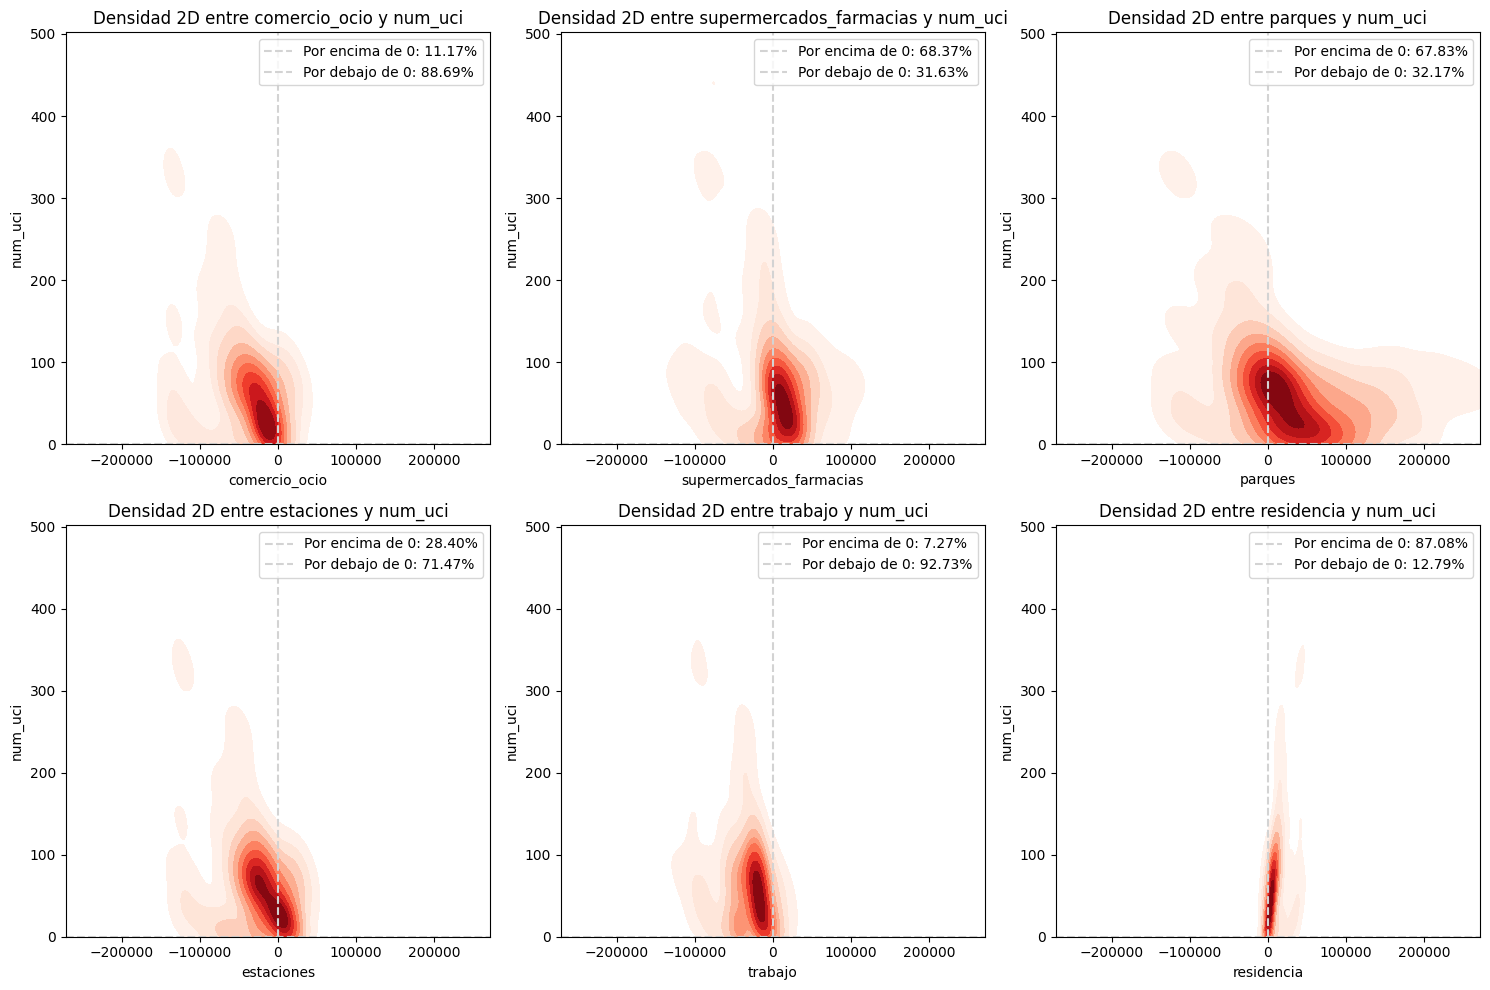

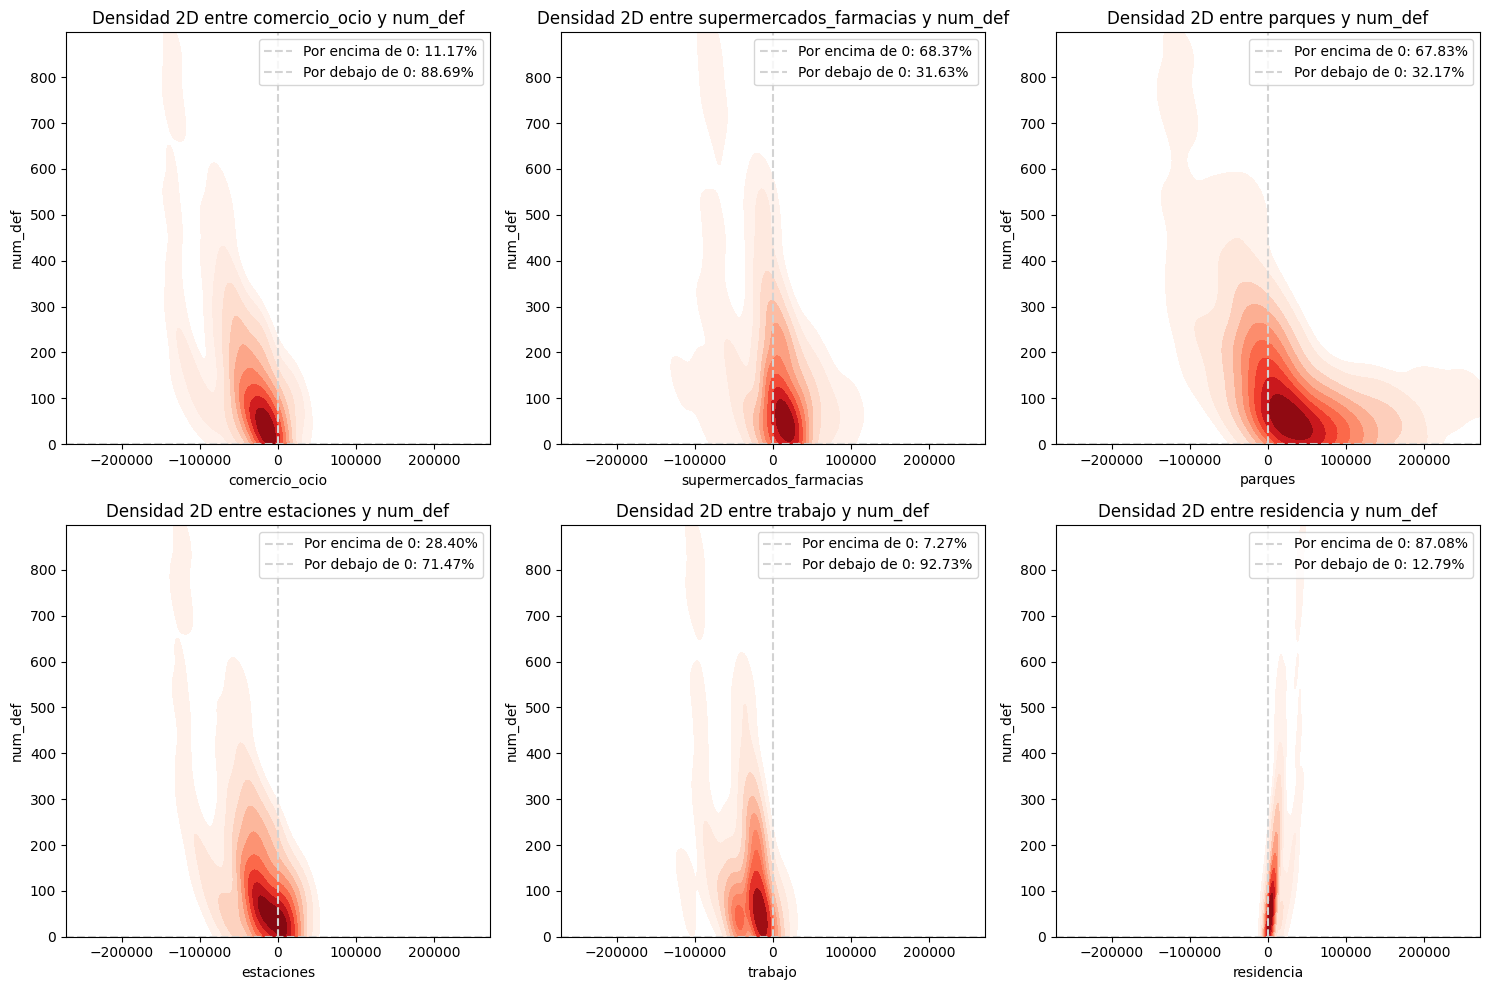

In [29]:
n_filas = 2
n_columnas = 3

# Itera a través de las columnas seleccionadas de 'f'
for covid_col in f.columns[1:5]:  # Ajusta el rango según sea necesario
    # Calcula el valor máximo para la columna actual
    max_valor_actual = f[covid_col].max()

    # Crea una figura y una matriz de ejes (subplots)
    fig, axes = plt.subplots(nrows=n_filas, ncols=n_columnas, figsize=(15, 10))

    for i, col in enumerate(num[4:]):
        ax = axes[i // n_columnas, i % n_columnas]
        sns.kdeplot(data=f, x=col, y=covid_col, cmap="Reds", fill=True, ax=ax)

        # Calcular los porcentajes de valores por encima y por debajo del 0
        porcentaje_por_encima = np.mean(f[col] > 0) * 100
        porcentaje_por_debajo = np.mean(f[col] < 0) * 100

        # Establece los límites para cada subplot
        ax.set_xlim(-limite_ejes, limite_ejes)
        ax.set_ylim(0, max_valor_actual)

        # Añade líneas en el 0 de ambos ejes
        ax.axhline(0, color='lightgray', linestyle='--')
        ax.axvline(0, color='lightgray', linestyle='--')

        # Añade etiquetas, título y leyenda para cada subplot
        ax.set_xlabel(col)
        ax.set_ylabel(covid_col)
        ax.set_title(f'Densidad 2D entre {col} y {covid_col}')
        ax.legend([f'Por encima de 0: {porcentaje_por_encima:.2f}%', 
                   f'Por debajo de 0: {porcentaje_por_debajo:.2f}%'])

    # Ajusta el layout para evitar la superposición de los subplots
    plt.tight_layout()

    # Muestra la figura completa con todos los subplots
    plt.show()


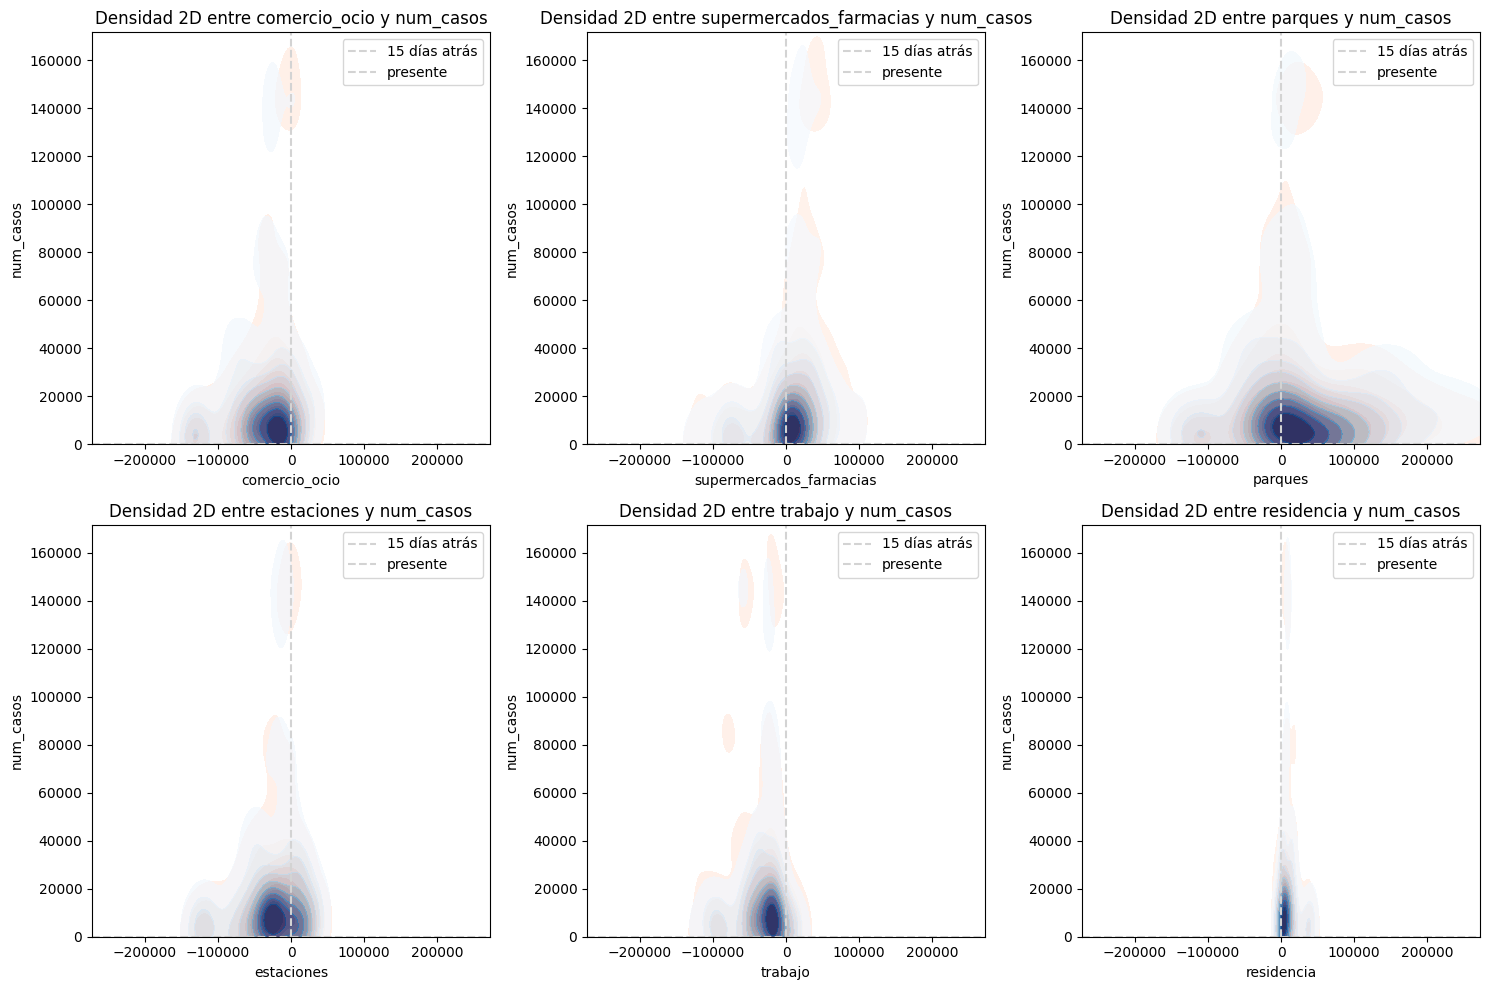

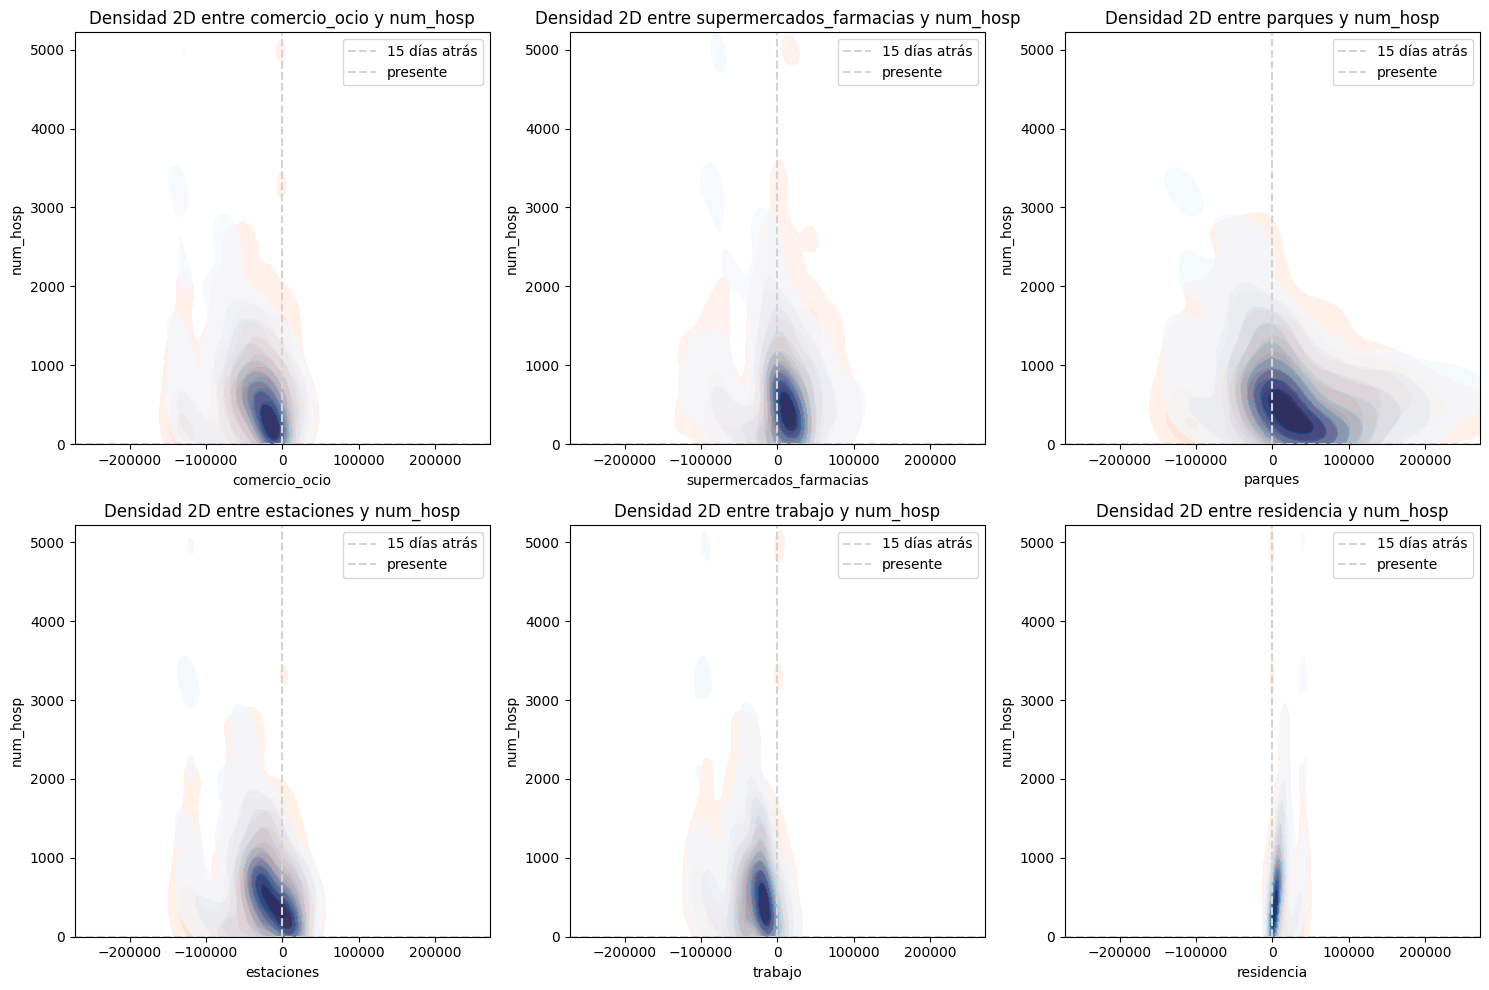

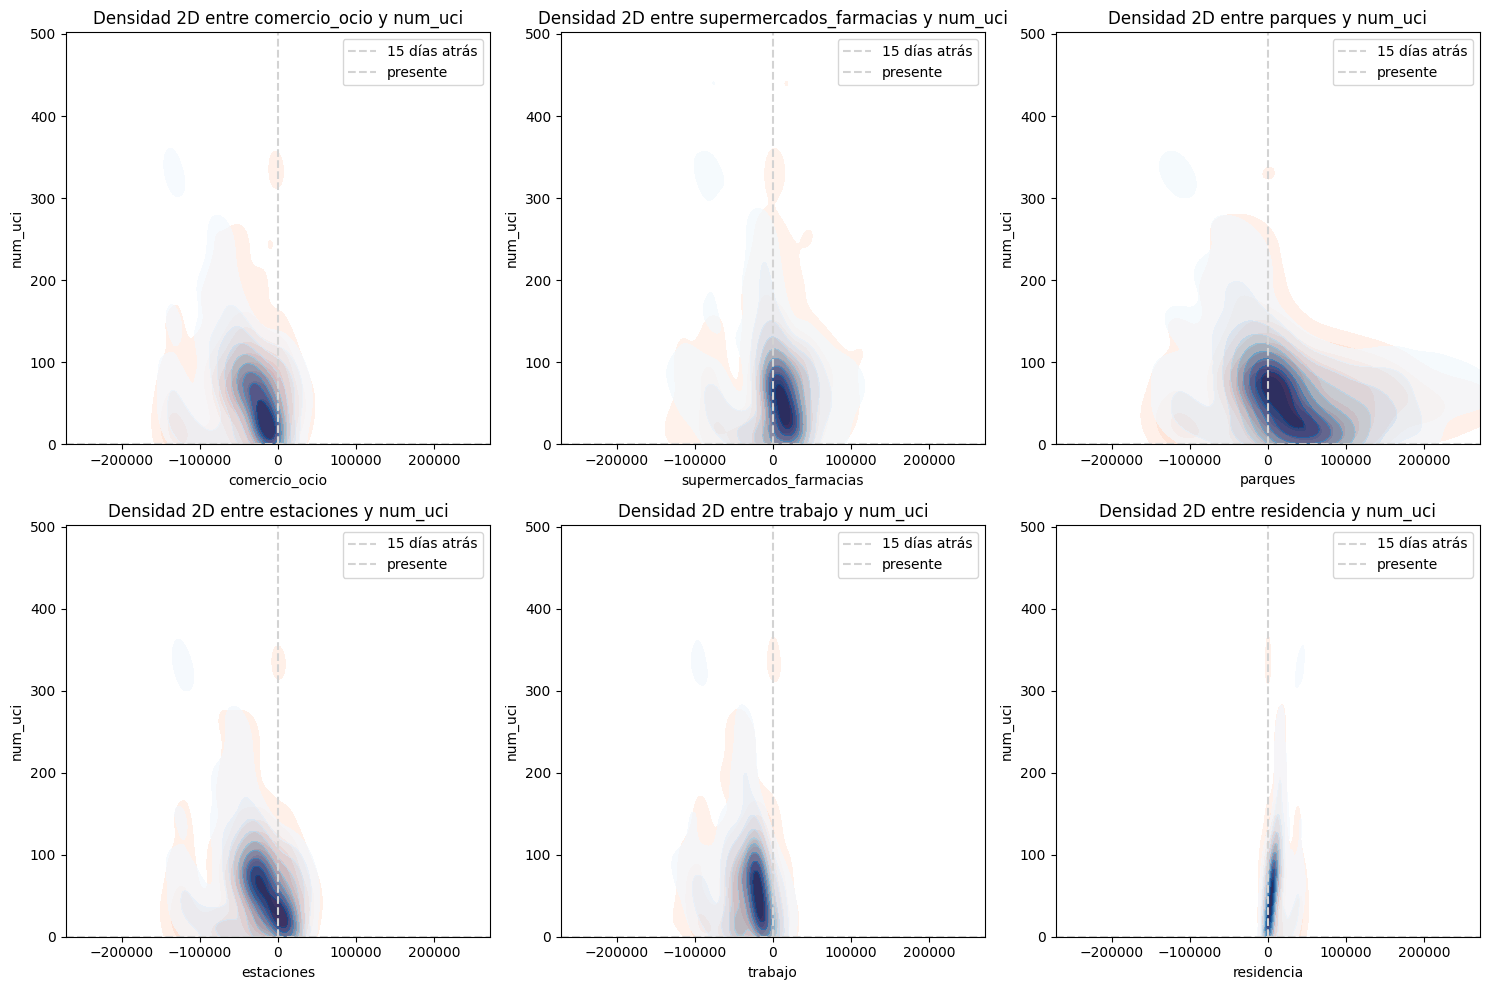

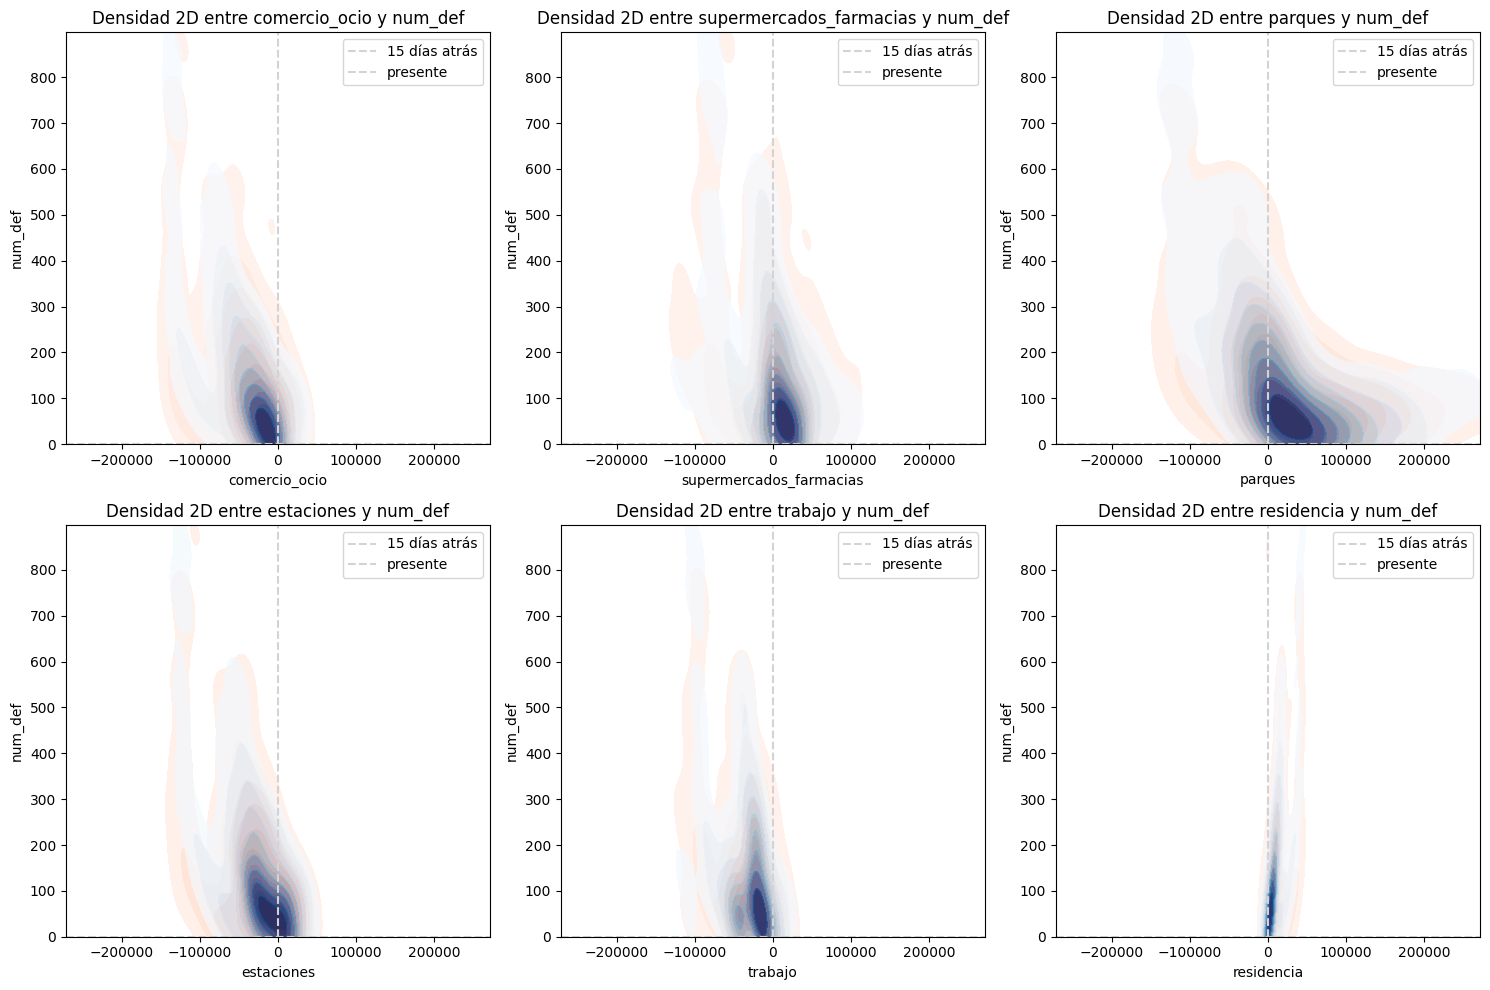

In [30]:
n_filas = 2
n_columnas = 3

# Crear un nuevo DataFrame con un desfase de 15 días hacia atrás
f_shifted = f.copy()
for col in num[4:]:
    f_shifted[col] = f[col].shift(15)   # Desfase de 15 días hacia atrás

# Crear un nuevo DataFrame con un desfase de 15 días hacia adelante
f_shifted_forward = f.copy()
for col in num[4:]:
    f_shifted_forward[col] = f[col].shift(0)  # Desfase de 15 días hacia adelante

# Itera a través de las columnas seleccionadas de 'f'
for covid_col in f.columns[1:5]:  # Ajusta el rango según sea necesario
    max_valor_actual = f[covid_col].max()

    fig, axes = plt.subplots(nrows=n_filas, ncols=n_columnas, figsize=(15, 10))

    for i, col in enumerate(num[4:]):
        ax = axes[i // n_columnas, i % n_columnas]

        # Graficar con desfase de 15 días hacia atrás
        sns.kdeplot(data=f_shifted, x=col, y=covid_col, cmap="Reds", fill=True, ax=ax, alpha=1)

        # Graficar con desfase de 15 días hacia adelante
        sns.kdeplot(data=f_shifted_forward, x=col, y=covid_col, cmap="Blues", fill=True, ax=ax, alpha=0.7)

        ax.set_xlim(-limite_ejes, limite_ejes)
        ax.set_ylim(0, max_valor_actual)
        ax.axhline(0, color='lightgray', linestyle='--')
        ax.axvline(0, color='lightgray', linestyle='--')
        ax.set_xlabel(col)
        ax.set_ylabel(covid_col)
        ax.set_title(f'Densidad 2D entre {col} y {covid_col}')
        ax.legend(['15 días atrás', 'presente'])

    plt.tight_layout()
    plt.show()




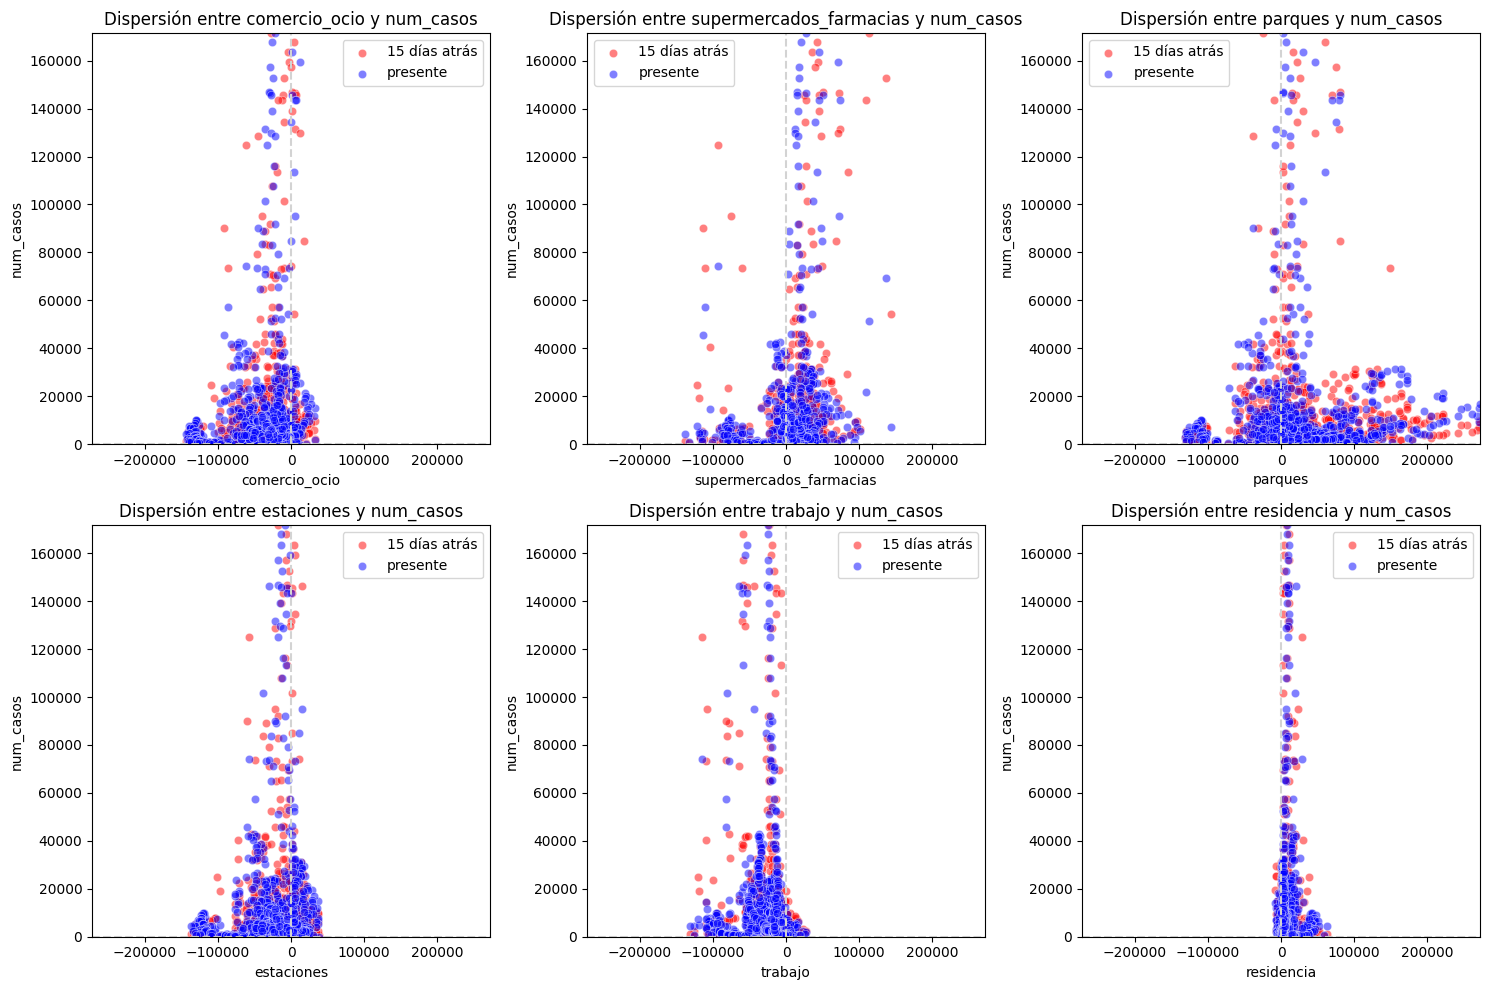

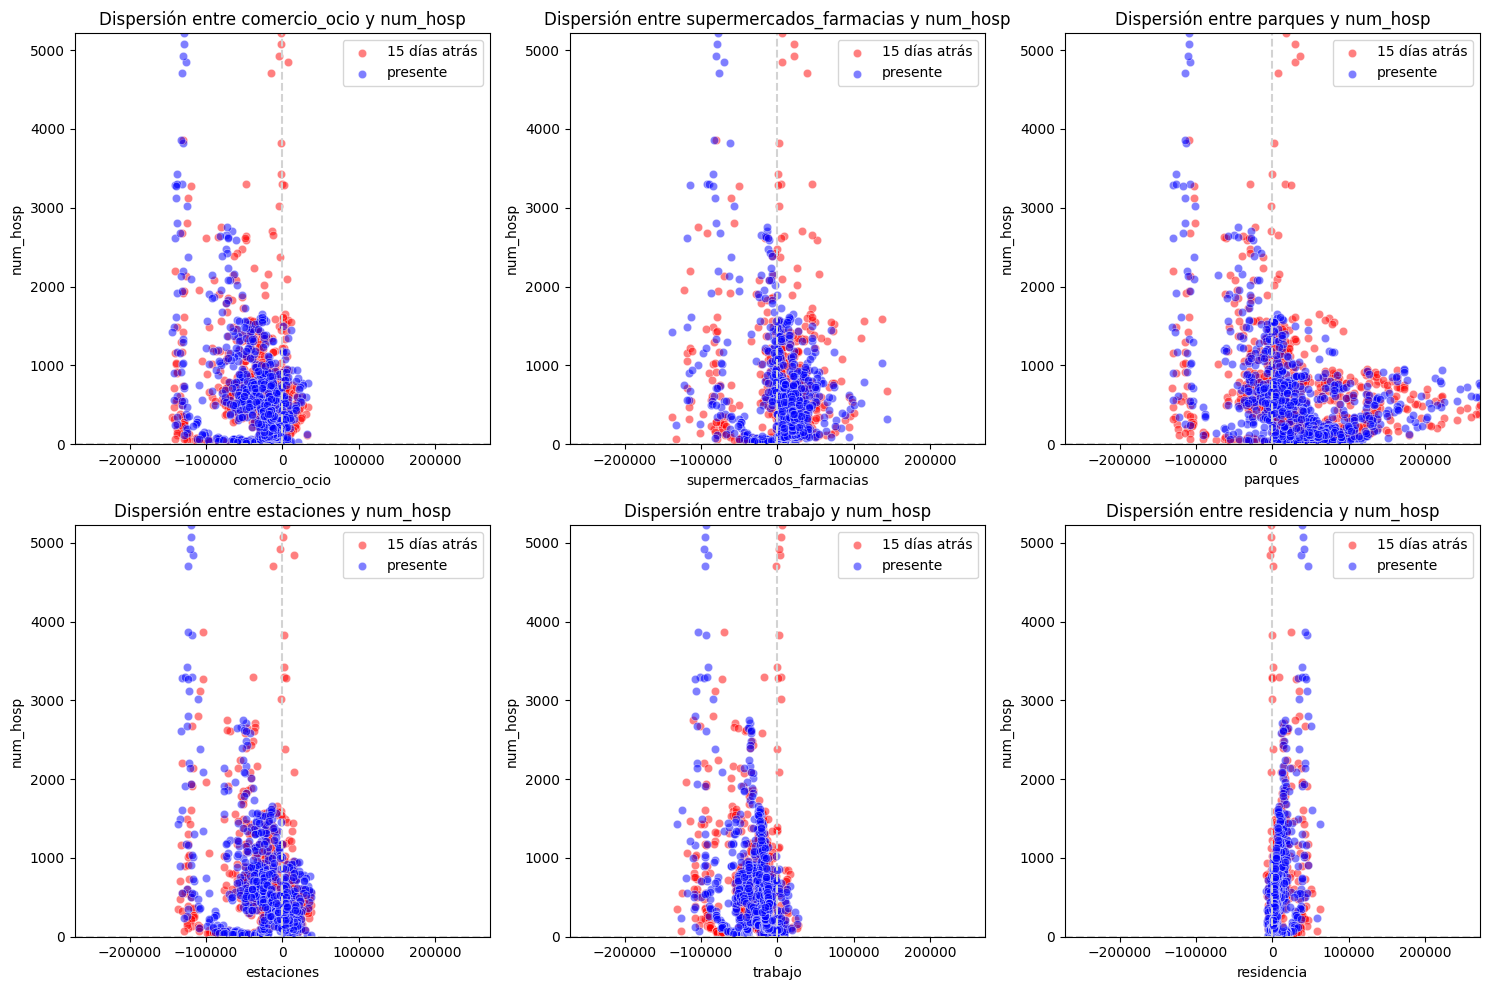

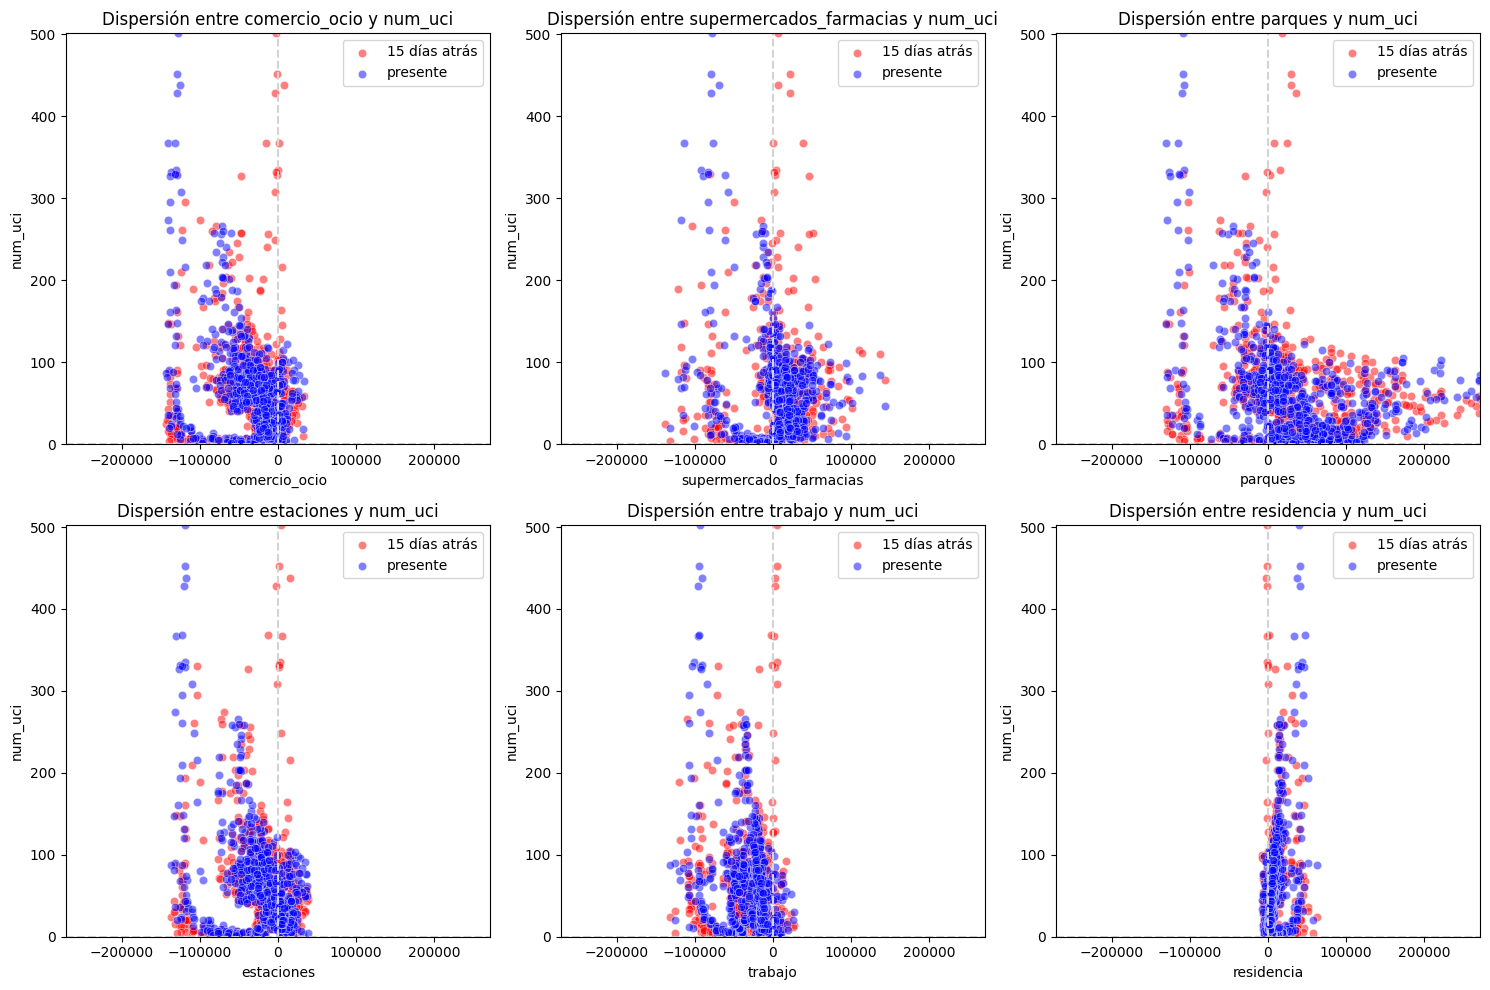

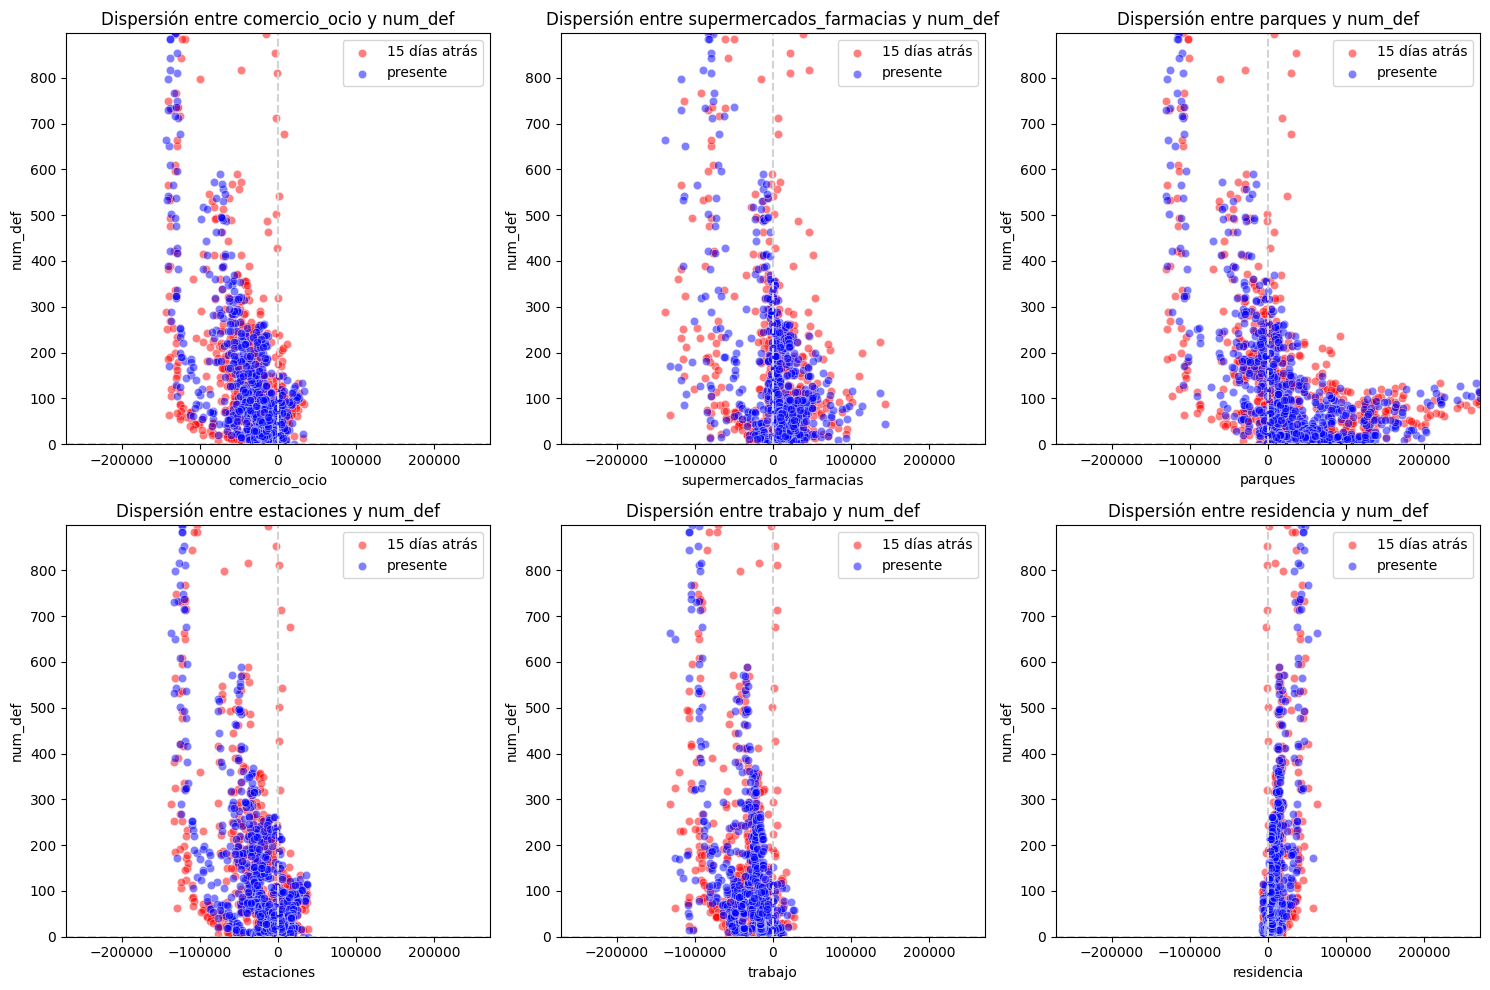

In [31]:
n_filas = 2
n_columnas = 3

# Crear un nuevo DataFrame con un desfase de 15 días hacia atrás
f_shifted = f.copy()
for col in num[4:]:
    f_shifted[col] = f[col].shift(15)  # Desfase de 15 días hacia atrás

# Crear un nuevo DataFrame con un desfase de 15 días hacia adelante
f_shifted_forward = f.copy()
for col in num[4:]:
    f_shifted_forward[col] = f[col].shift(0)  # Desfase de 15 días hacia adelante

# Itera a través de las columnas seleccionadas de 'f'
for covid_col in f.columns[1:5]:  # Ajusta el rango según sea necesario
    max_valor_actual = f[covid_col].max()

    fig, axes = plt.subplots(nrows=n_filas, ncols=n_columnas, figsize=(15, 10))

    for i, col in enumerate(num[4:]):
        ax = axes[i // n_columnas, i % n_columnas]

        # Graficar con desfase de 15 días hacia atrás
        sns.scatterplot(data=f_shifted, x=col, y=covid_col, ax=ax, color='red', alpha=0.5)

        # Graficar con desfase de 15 días hacia adelante
        sns.scatterplot(data=f_shifted_forward, x=col, y=covid_col, ax=ax, color='blue', alpha=0.5)

        ax.set_xlim(-limite_ejes, limite_ejes)
        ax.set_ylim(0, max_valor_actual)
        ax.axhline(0, color='lightgray', linestyle='--')
        ax.axvline(0, color='lightgray', linestyle='--')
        ax.set_xlabel(col)
        ax.set_ylabel(covid_col)
        ax.set_title(f'Dispersión entre {col} y {covid_col}')
        ax.legend(['15 días atrás', 'presente'])

    plt.tight_layout()
    plt.show()


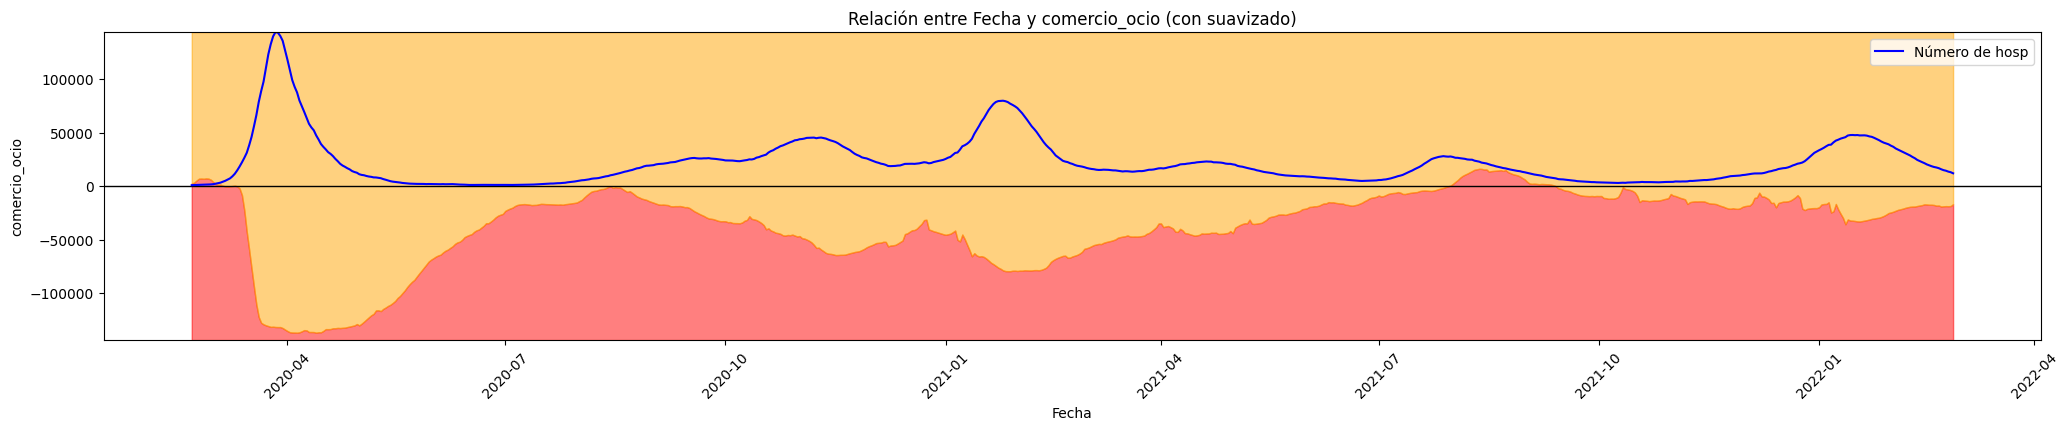

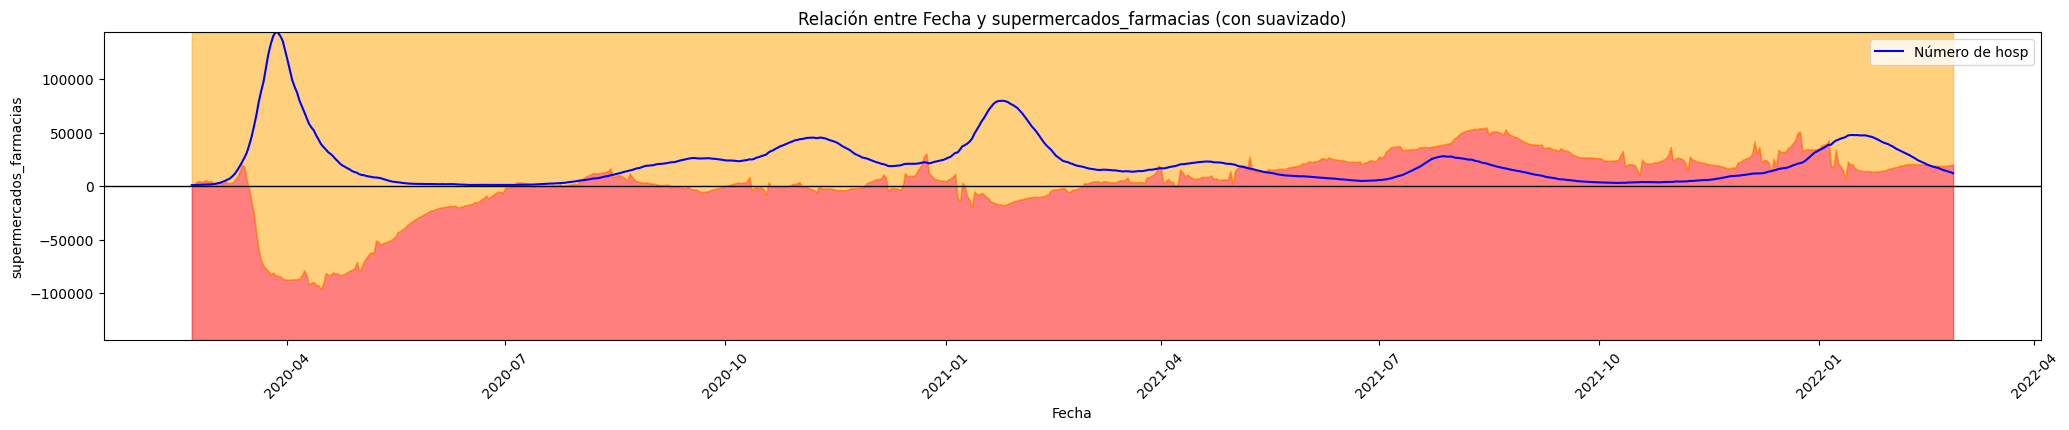

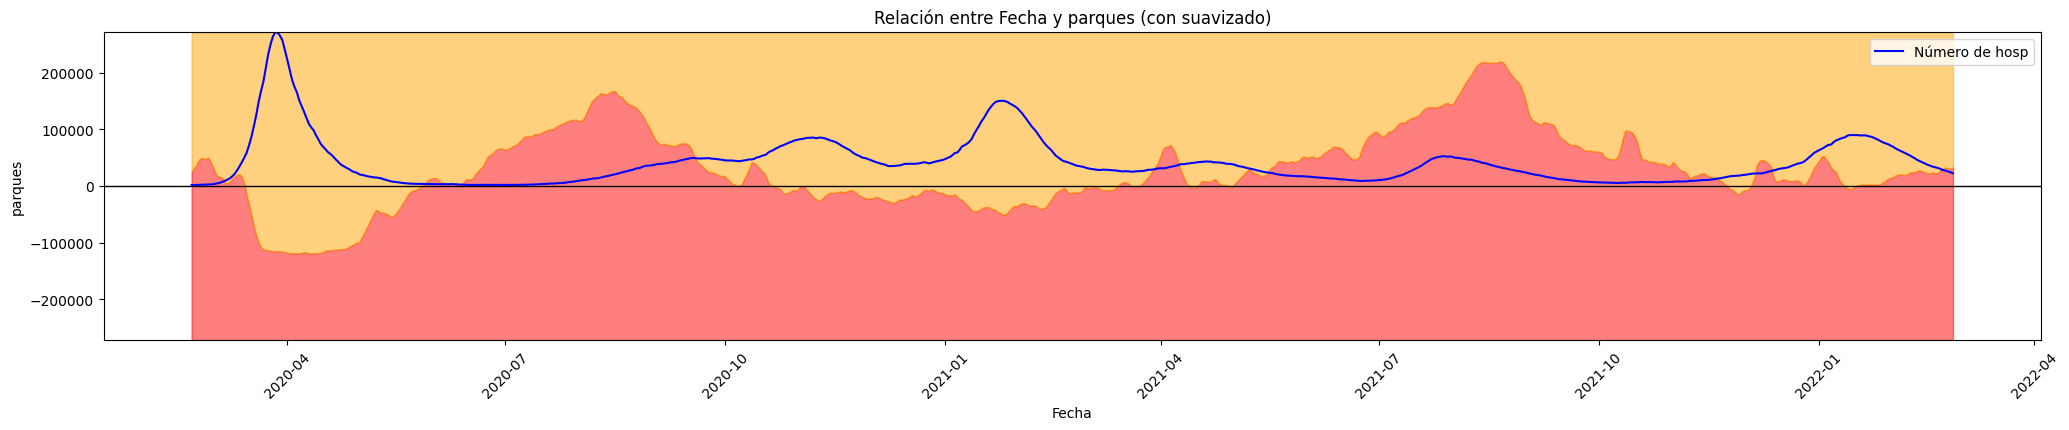

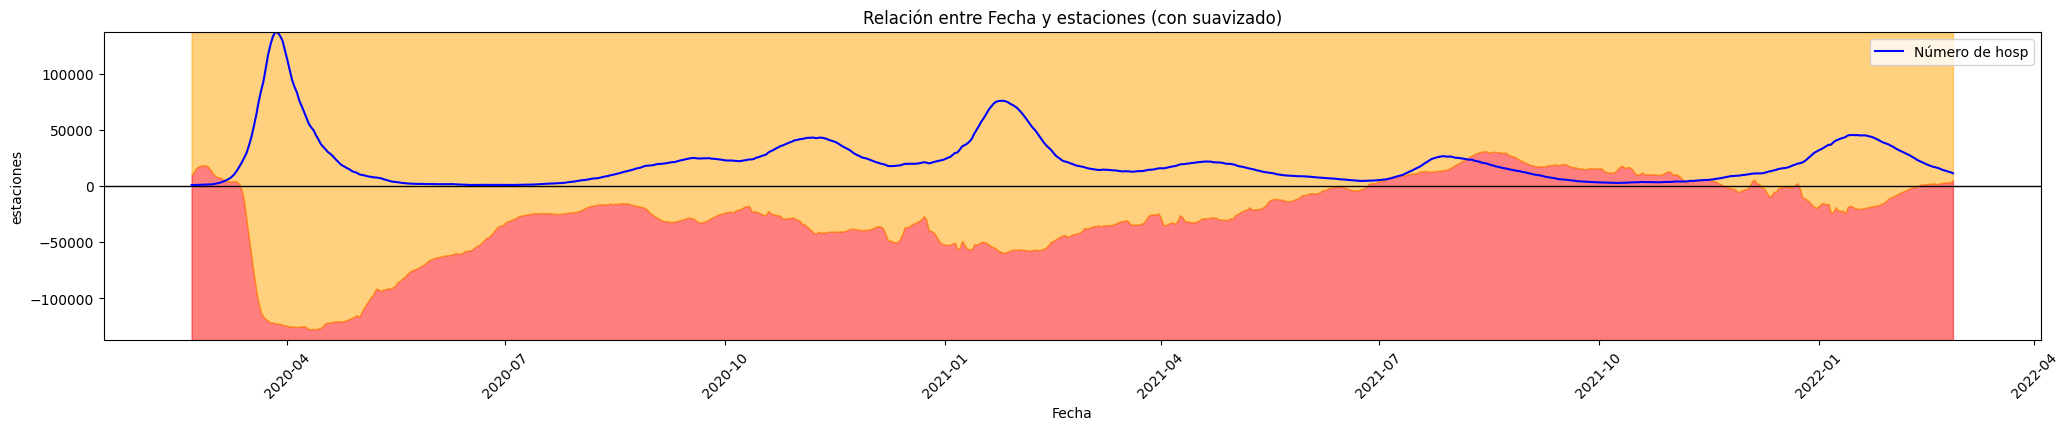

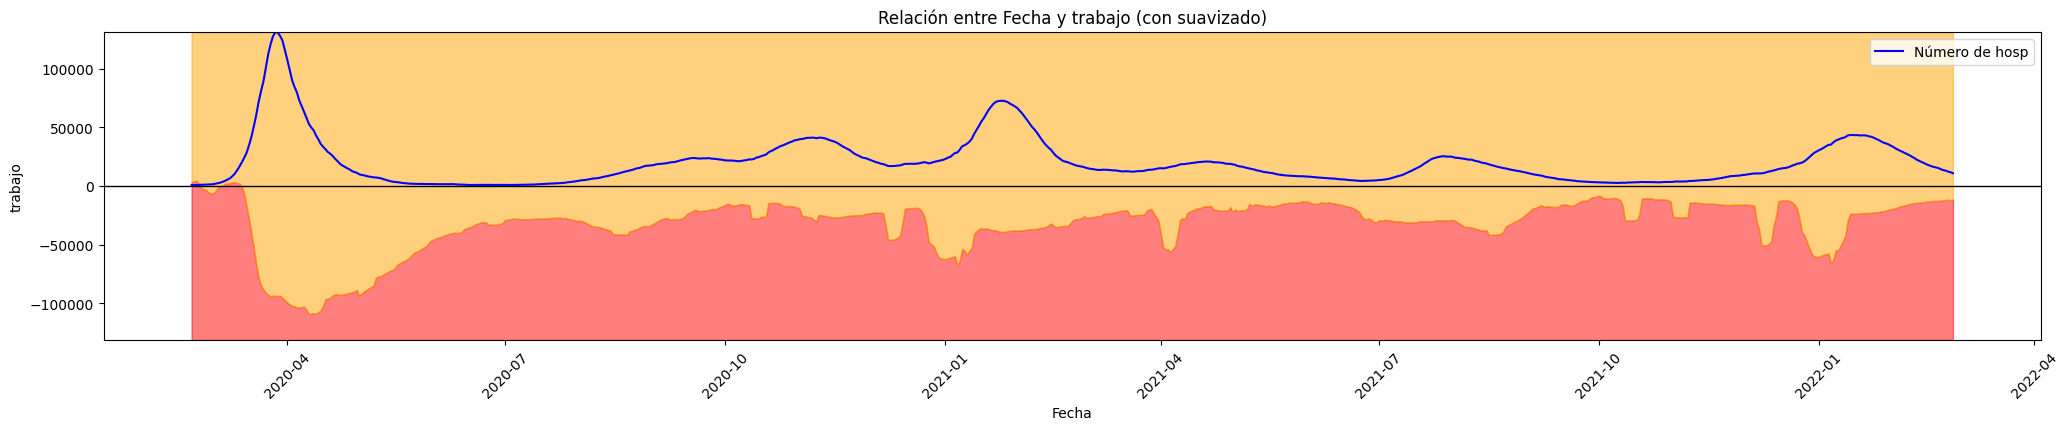

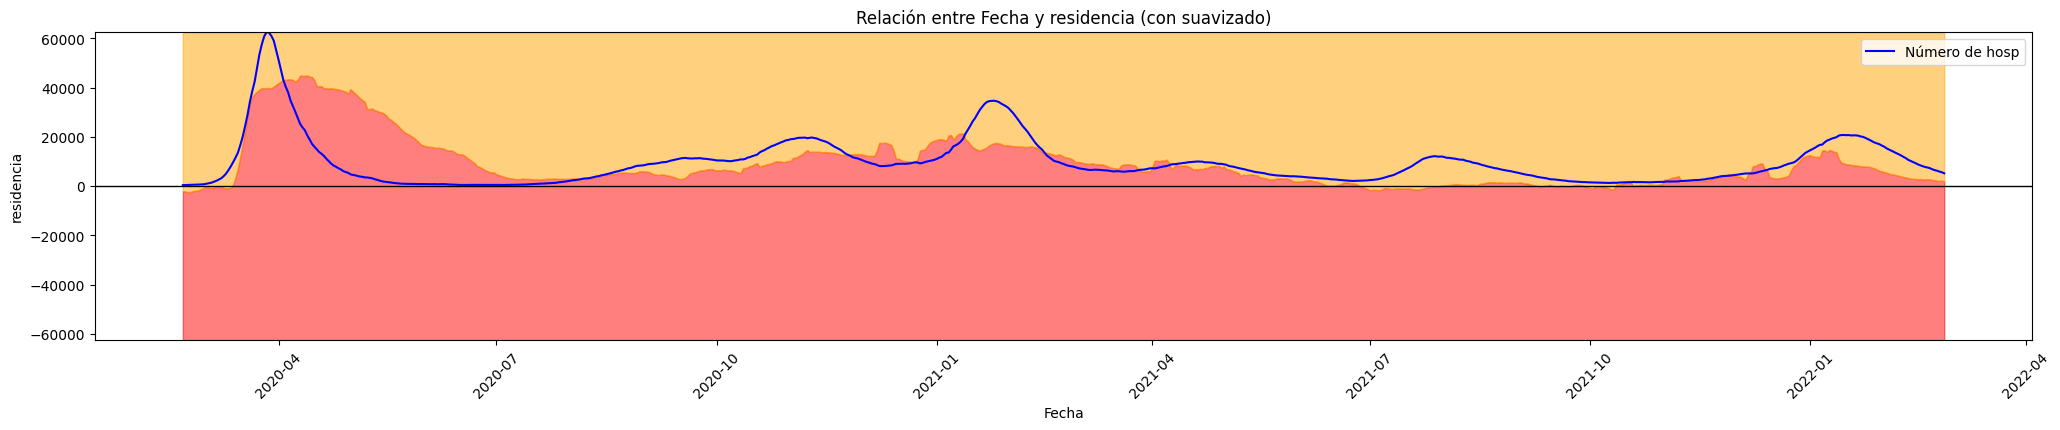

In [32]:
ventana = 7
f['num_hosp_suavizado'] = f['num_hosp'].rolling(window=ventana).mean()

for col in num[4:]:
    # Calcula el promedio móvil
    f[f'{col}_suavizado'] = f[col].rolling(window=ventana).mean()

    # Encuentra el valor máximo absoluto entre el mínimo y el máximo para ajustar el eje y
    max_val = max(f[col].max(), abs(f[col].min()))

    # Escala 'num_casos_suavizado' para que su máximo sea igual a 'max_val'
    max_num_hosp_suavizado = f['num_hosp_suavizado'].max()
    f['num_hosp_suavizado_escalado'] = f['num_hosp_suavizado'] * (max_val / max_num_hosp_suavizado)

    plt.figure(figsize=(25, 4))

    # Área desde la línea de suavizado hasta -max_val (rojo)
    plt.fill_between(f['fecha'], f[f'{col}_suavizado'], -max_val, color='red', alpha=0.5)

    # Área desde la línea de suavizado hasta max_val (naranja)
    plt.fill_between(f['fecha'], f[f'{col}_suavizado'], max_val, color='orange', alpha=0.5)

    # Añadir una línea horizontal en el 0
    plt.axhline(0, color='black', linewidth=1)

    # Añadir la línea de 'num_casos_suavizado' escalada
    plt.plot(f['fecha'], f['num_hosp_suavizado_escalado'], label='Número de hosp', color='blue')

    plt.xlabel('Fecha')
    plt.ylabel(col)
    plt.title(f'Relación entre Fecha y {col} (con suavizado)')
    plt.xticks(rotation=45)
    plt.ylim(-max_val, max_val)
    plt.legend()
    plt.show()


C:\Users\jcrub\AppData\Local\Temp\ipykernel_21560\3297329761.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


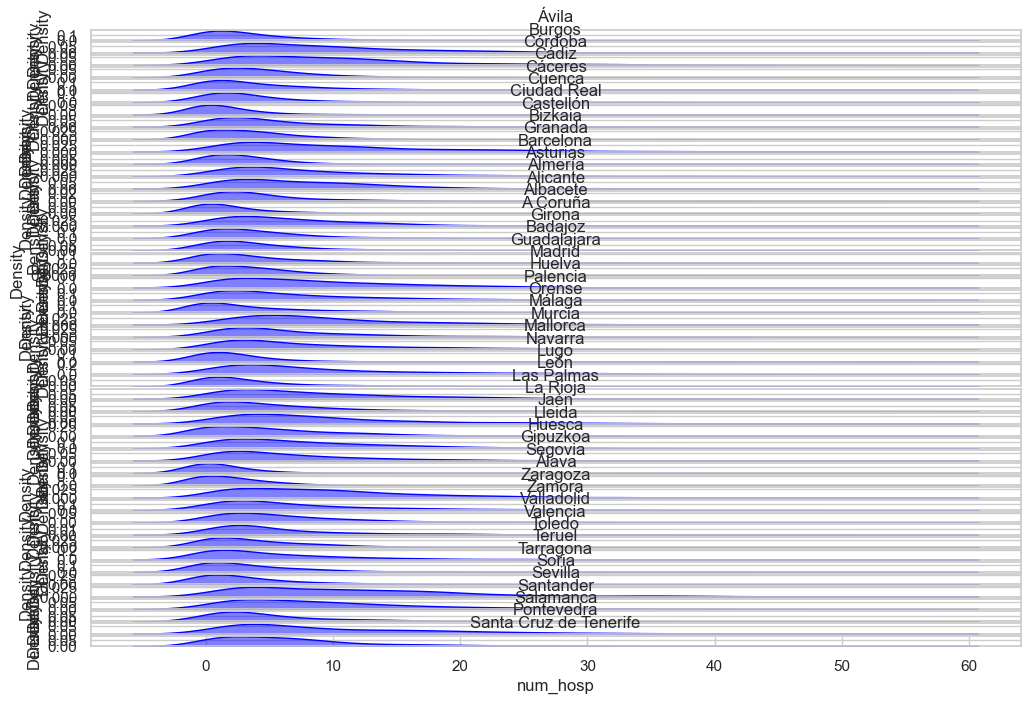

In [33]:
# Configuración para el gráfico Ridge Line
sns.set(style="whitegrid")

# Crear una figura
plt.figure(figsize=(12, 8))

# Iterar sobre las provincias y crear un gráfico Ridge Line para cada una
for i, provincia in enumerate(fp['provincia'].unique()):
    # Crear un subplot para cada provincia
    plt.subplot(len(fp['provincia'].unique()), 1, i + 1)

    # Graficar un Ridge Line para la provincia actual
    sns.kdeplot(
        fp[fp['provincia'] == provincia]['num_hosp'],  # Filtrar el DataFrame según la provincia actual
        fill=True,  # Relleno bajo la curva
        alpha=0.5,   # Transparencia
        color='blue' # Color de la línea
    )

    # Eliminar eje x para todos excepto el último subplot
    if i < len(fp['provincia'].unique()) - 1:
        plt.xlabel('')
        plt.xticks([])

    plt.title(provincia)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [34]:
# Calcula la correlación de Pearson
correlacion = f['num_hosp'].corr(f['comercio_ocio'])

print("Correlación de Pearson entre 'num_hosp' y 'comercio_ocio':", correlacion)


Correlación de Pearson entre 'num_hosp' y 'comercio_ocio': -0.4835168588354085


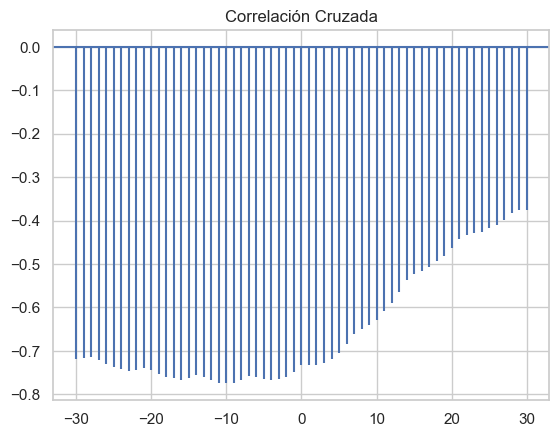

In [35]:
# Correlación cruzada
plt.xcorr(f['num_hosp'], f['comercio_ocio'], maxlags=30)
plt.title('Correlación Cruzada')
plt.show()

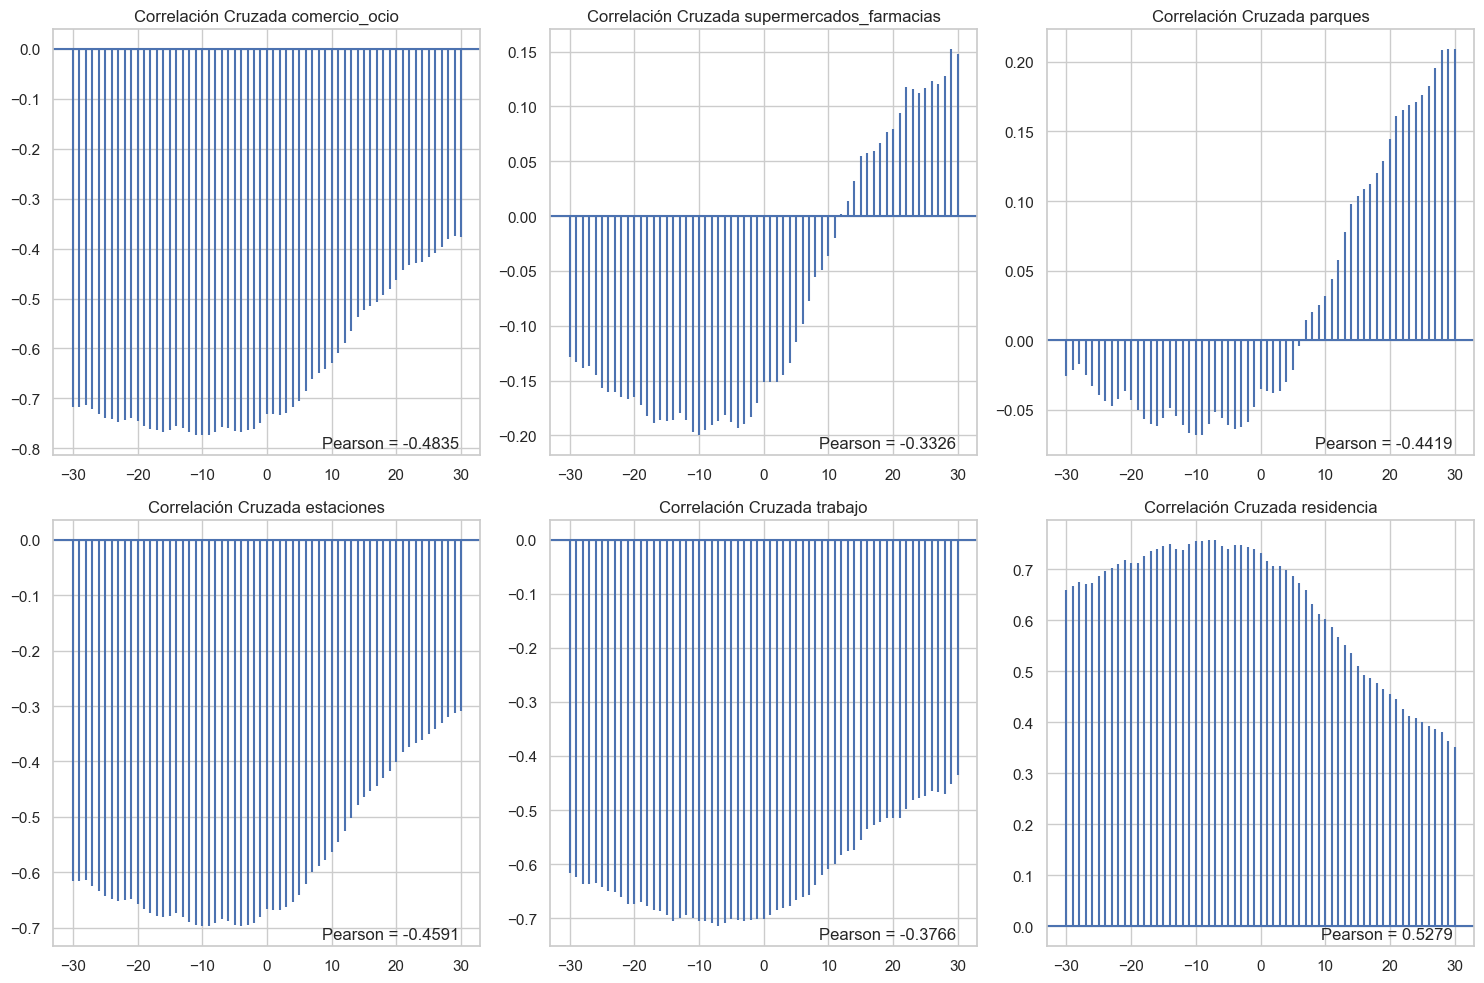

In [36]:
# Número de filas y columnas para la matriz de subgráficos
n_filas = 2
n_columnas = 3

# Crea una figura y una matriz de ejes (subplots)
fig, axes = plt.subplots(nrows=n_filas, ncols=n_columnas, figsize=(15, 10))

# Itera a través de las columnas y dibuja cada gráfico en un eje
for i, col in enumerate(num[4:]):
    ax = axes[i // n_columnas, i % n_columnas]  # Seleccionar el subplot correcto

    # Calcula la correlación de Pearson
    correlacion_pearson = f['num_hosp'].corr(f[col])

    # Crear el gráfico de correlación cruzada en el subplot correspondiente
    ax.xcorr(f['num_hosp'], f[col], maxlags=30)
    ax.set_title(f'Correlación Cruzada {col}')

    # Añadir la leyenda con la correlación de Pearson en el subplot
    ax.text(0.95, 0.01, f'Pearson = {correlacion_pearson:.4f}', horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

# Ajusta el layout para evitar la superposición de los subplots
plt.tight_layout()

# Muestra la figura completa con todos los subgráficos
plt.show()
